# <span style='color: gold'>P6 - Classifiez automatiquement des biens de consommation</span>

![logo_projet.png](logo_projet.png)

## <span style='background:PowderBlue' id="#section_2">1. Introduction</span>

Le but de ce projet est de réaliser une première étude de faisabilité d'un moteur de classification d'articles pour une marketplace e-commerce. L'étude sera basée sur l'image et la description d'article pour l'automatisation de l'attribution de la catégorie de l'article.

Voici les contraintes : 

Afin d’extraire les features **texte**, il sera nécessaire de mettre en œuvre :
- Deux approches de type “bag-of-words”, comptage simple de mots et Tf-idf 
- Une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText) 
- Une approche de type word/sentence embedding avec BERT 
- Une approche de type word/sentence embedding avec USE (Universal Sentence Encoder)
  
Afin d’extraire les features **image**, il sera nécessaire de mettre en œuvre :
- Un algorithme de type SIFT / ORB / SURF ;
- Un algorithme de type CNN Transfer Learning.

In [ ]:
# Chargement des librairies
import datetime
import time
import sys
import os
import string
import json
from datetime import datetime
from IPython.display import display, HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Réduction dimension
from sklearn.manifold import TSNE
# Traitement images
from PIL import Image as Image_PIL, ImageOps, ImageFilter
import cv2
from scipy.ndimage import gaussian_filter

import numpy as np
import pandas as pd
import fonctions_data
import texthero as hero
import cprint
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import module_name
from module_name import *


#Algorithmes de classification supervisée
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import MiniBatchKMeans

# Feature extraction
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, \
    HashingVectorizer

#Traitement de texte
import texthero as hero
from texthero import preprocessing
import nltk
import gensim
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from stop_words import get_stop_words
from gensim.models import Word2Vec
import multiprocessing

# Réduction dimension
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# BERT
import transformers
from sentence_transformers import SentenceTransformer

# USE
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import tensorflow_hub as hub
from sklearn.manifold import TSNE

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import adjusted_rand_score, silhouette_score, homogeneity_score, recall_score, f1_score

# normalisation, encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Versions
print('Version des librairies utilisées :')
#print('jyquickhelper         : ' + jyquickhelper.__version__)
print('Python                : ' + sys.version)
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Matplotlib            : ' + mpl.__version__)
print('Seaborn               : ' + sns.__version__)
print('Sklearn               : ' + sklearn.__version__)
print('Outils dataframe      : ' + fonctions_data.__version__)
now = datetime.now().isoformat()
print('Lancé le           : ' + now)

## <span style='background:PowderBlue' id="#section_2">1. Introduction</span>

Le but de ce projet est de réaliser une première étude de faisabilité d'un moteur de classification d'articles pour une marketplace e-commerce. L'étude sera basée sur l'image et la description d'article pour l'automatisation de l'attribution de la catégorie de l'article.

Voici les contraintes : 

Afin d’extraire les features **texte**, il sera nécessaire de mettre en œuvre :
- Deux approches de type “bag-of-words”, comptage simple de mots et Tf-idf 
- Une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText) 
- Une approche de type word/sentence embedding avec BERT 
- Une approche de type word/sentence embedding avec USE (Universal Sentence Encoder)
  
Afin d’extraire les features **image**, il sera nécessaire de mettre en œuvre :
- Un algorithme de type SIFT / ORB / SURF ;
- Un algorithme de type CNN Transfer Learning.

In [5]:
# Chargement des librairies
import datetime
import time
import sys
import os
import string
import json
from datetime import datetime
from IPython.display import display, HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Réduction dimension
from sklearn.manifold import TSNE
# Traitement images
from PIL import Image as Image_PIL, ImageOps, ImageFilter
import cv2
from scipy.ndimage import gaussian_filter

import numpy as np
import pandas as pd
import fonctions_data
import texthero as hero
import cprint
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import module_name
from module_name import *


#Algorithmes de classification supervisée
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import MiniBatchKMeans

# Feature extraction
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, \
    HashingVectorizer

#Traitement de texte
import texthero as hero
from texthero import preprocessing
import nltk
import gensim
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from stop_words import get_stop_words
from gensim.models import Word2Vec
import multiprocessing

# Réduction dimension
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# BERT
import transformers
from sentence_transformers import SentenceTransformer

# USE
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import tensorflow_hub as hub
from sklearn.manifold import TSNE

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import adjusted_rand_score, silhouette_score, homogeneity_score, recall_score, f1_score

# normalisation, encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Versions
print('Version des librairies utilisées :')
#print('jyquickhelper         : ' + jyquickhelper.__version__)
print('Python                : ' + sys.version)
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Matplotlib            : ' + mpl.__version__)
print('Seaborn               : ' + sns.__version__)
print('Sklearn               : ' + sklearn.__version__)
print('Outils dataframe      : ' + fonctions_data.__version__)
now = datetime.now().isoformat()
print('Lancé le           : ' + now)

Version des librairies utilisées :
Python                : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
NumPy                 : 1.24.4
Pandas                : 1.5.3
Matplotlib            : 3.7.5
Seaborn               : 0.13.2
Sklearn               : 1.3.0
Outils dataframe      : 0.0.0
Lancé le           : 2024-04-12T18:39:06.970307
Version des librairies utilisées :
Python                : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
NumPy                 : 1.24.4
Pandas                : 1.5.3
Matplotlib            : 3.7.5
Seaborn               : 0.13.2
Sklearn               : 1.3.0
Outils dataframe      : 0.0.0
Lancé le           : 2024-04-12T18:39:07.561392


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yanni\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## <span style='background:PowderBlue' id="#section_2">2. Dataset</span>

In [6]:
# Nombre aléatoire pour la reproductibilité des résultats
seed = 21

In [7]:
# Chargement du jeu de données

data = pd.read_csv('Data/Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [8]:
data_work = pd.read_csv('data_work.csv')

## <span style='background:PowderBlue'>3. Classification Supervisée</span>

### <span style='background:orange'>3.1. NLP : Word & Text Embeddings</span>

### <span> **Fonction d'évaluation des modèles de classification (supervisée)** </span>

Afin de comparer les modèles de classification, nous avons évalué quatre indicateurs :

>- **Précision** : capacité à prédire correctement les tags associés à chaque document
> - **Recall** : capacité à retourner pour chaque tags tous les documents qui y sont associés
>- **F1 Score** : moyenne harmonique de ces deux indicateurs

Etant face à une classification multi-classes nous utilisons les version micro de ces indicateurs. Concrètement, cette version des indicateurs est calculée par classe puis agrégés là où les indicateurs macro sont calculés globalement. Lors de l’évaluation nous nous intéressons à la précision et au temps d’entraînement. 

In [318]:
models_performance = {}

#### <span style='background:wheat'>3.1.1 BERT</span>

#### <span style='background:gold'> 3.1.1.1 RoBERTa large model(nli-mean-tokens)</span>

<span style='background:orange'>**3.1.1.1.1 description** - originale (non nettoyée)</span>

In [9]:
cols = ['VAR1', 'VAR2']

In [10]:
# Variable dont on veut extraire les features
data_work['description'] = \
    data_work['description'].fillna('').astype(str)
data_desc_orig = data_work['description']

In [11]:
data_work.columns

Index(['Unnamed: 0', 'category', 'product_name', 'brand', 'image',
       'product_category_tree', 'description', 'product_specifications',
       'label', 'desc_clean', 'pname_clean', 'brand_clean', 'prod_spec_clean',
       'desc_lem', 'pname_lem', 'brand_lem', 'prod_spec_lem', 'desc_stem',
       'pname_stem', 'brand_stem', 'prod_spec_stem'],
      dtype='object')

In [614]:
type_donnee = 'TSNE_ROBERTA_DESC_ORIG_LEM'

**Modélisation**

In [615]:
# Instanciation du modèle
bert_desc_orig = SentenceTransformer('roberta-large-nli-mean-tokens')

# Encodage
vector_roberta_desc_orig = \
    bert_desc_orig.encode(data_desc_orig, show_progress_bar=False)

In [617]:
# Réduction de dimension tsne
tsne_roberta_desc_orig = TSNE(verbose=1, perplexity=50, n_iter=5000)
X_proj_tsne_roberta_desc_orig = \
    tsne_roberta_desc_orig.fit_transform(vector_roberta_desc_orig)
# Dataframe pour clustering
df_tsne_roberta_desc_orig = pd.DataFrame({'VAR1' : X_proj_tsne_roberta_desc_orig[:, 0],
                                          'VAR2' : X_proj_tsne_roberta_desc_orig[:, 1],
                                          'CATEGORIE' : data['Categorie_1']})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.000s...
[t-SNE] Computed neighbors for 1050 samples in 0.120s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 5.997525
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.106369
[t-SNE] KL divergence after 4750 iterations: 0.622526


**Jeu d'entrainement, et test**

In [627]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_roberta_desc_orig[cols], data_work.label, test_size=0.15, stratify=data_work.label, random_state=1944)

**Evaluation des modèles de classification supervisée**

**Algorithme KNN**

In [634]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.8991
Precision:
  - Macro: 0.8999
  - Micro: 0.8991
Recall:
  - Macro: 0.8991
  - Micro: 0.8991
F1-measure:
  - Macro: 0.8986
  - Micro: 0.8991


{'knn': {'micro_precision': 0.899103139013453,
  'micro_recall': 0.899103139013453,
  'micro_f1': 0.899103139013453}}

**Algorithme SVM**

In [635]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.4406
Precision:
  - Macro: 0.3709
  - Micro: 0.4406
Recall:
  - Macro: 0.4403
  - Micro: 0.4406
F1-measure:
  - Macro: 0.3766
  - Micro: 0.4406


{'knn': {'micro_precision': 0.899103139013453,
  'micro_recall': 0.899103139013453,
  'micro_f1': 0.899103139013453},
 'svm': {'micro_precision': 0.4405829596412556,
  'micro_recall': 0.4405829596412556,
  'micro_f1': 0.4405829596412556}}

**Algorithme Random Forest**

In [636]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.899103139013453,
  'micro_recall': 0.899103139013453,
  'micro_f1': 0.899103139013453},
 'svm': {'micro_precision': 0.4405829596412556,
  'micro_recall': 0.4405829596412556,
  'micro_f1': 0.4405829596412556},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Algorithme Gradient Boosting**

In [640]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9709
Precision:
  - Macro: 0.9718
  - Micro: 0.9709
Recall:
  - Macro: 0.9709
  - Micro: 0.9709
F1-measure:
  - Macro: 0.9708
  - Micro: 0.9709


{'knn': {'micro_precision': 0.899103139013453,
  'micro_recall': 0.899103139013453,
  'micro_f1': 0.899103139013453},
 'svm': {'micro_precision': 0.4405829596412556,
  'micro_recall': 0.4405829596412556,
  'micro_f1': 0.4405829596412556},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9708520179372198,
  'micro_recall': 0.9708520179372198,
  'micro_f1': 0.9708520179372198}}

**Algorithme Naive Bayes**

In [641]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.6345
Precision:
  - Macro: 0.6273
  - Micro: 0.6345
Recall:
  - Macro: 0.6348
  - Micro: 0.6345
F1-measure:
  - Macro: 0.6038
  - Micro: 0.6345


{'knn': {'micro_precision': 0.899103139013453,
  'micro_recall': 0.899103139013453,
  'micro_f1': 0.899103139013453},
 'svm': {'micro_precision': 0.4405829596412556,
  'micro_recall': 0.4405829596412556,
  'micro_f1': 0.4405829596412556},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9708520179372198,
  'micro_recall': 0.9708520179372198,
  'micro_f1': 0.9708520179372198},
 'Naive Bayes': {'micro_precision': 0.6345291479820628,
  'micro_recall': 0.6345291479820628,
  'micro_f1': 0.6345291479820628}}

**Extra Trees Classifier**

In [642]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.899103139013453,
  'micro_recall': 0.899103139013453,
  'micro_f1': 0.899103139013453},
 'svm': {'micro_precision': 0.4405829596412556,
  'micro_recall': 0.4405829596412556,
  'micro_f1': 0.4405829596412556},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9708520179372198,
  'micro_recall': 0.9708520179372198,
  'micro_f1': 0.9708520179372198},
 'Naive Bayes': {'micro_precision': 0.6345291479820628,
  'micro_recall': 0.6345291479820628,
  'micro_f1': 0.6345291479820628},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [643]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.899103,0.899103,0.899103
svm,0.440583,0.440583,0.440583
Random Forest,1.000000,1.000000,1.000000
Gradient Boosting,0.970852,0.970852,0.970852
Naive Bayes,0.634529,0.634529,0.634529
extra tree classifier,1.000000,1.000000,1.000000


Au vue des résulats des précisions des métriques, nous allons retenir l'algorithme 'Extra Tree Classifier'

**Entrainement du modèle**

In [644]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.861


In [647]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)
#test_labels = le.inverse_transform(y_test)
labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_desc_lem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_desc_lem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY TSNE_ROBERTA_DESC_ORIG_LEM (Test): {:.3}".format(accuracy_tsne_roberta_desc_lem_test))
print("ACCURACY TSNE_ROBERTA_DESC_ORIG_LEM (Train): {:.3}".format(accuracy_tsne_roberta_desc_lem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[19  1  0  0  3  0  0]
 [ 2 16  1  2  1  0  0]
 [ 0  0 23  0  0  0  0]
 [ 1  0  0 21  0  1  0]
 [ 3  0  0  2 18  0  0]
 [ 0  0  0  4  1 17  0]
 [ 0  0  0  0  0  0 22]]
Correspondance des clusters :  [0 1 2 3 4 5 6]
Correspondance des clusters :  [0 1 2 3 4 5 6]

ACCURACY TSNE_ROBERTA_DESC_ORIG_LEM (Test): 0.861
ACCURACY TSNE_ROBERTA_DESC_ORIG_LEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.94      0.73      0.82        22
           2       0.96      1.00      0.98        23
           3       0.72      0.91      0.81        23
           4       0.78      0.78      0.78        23
           5       0.94      0.77      0.85        22
           6       1.00      1.00      1.00        22

    accuracy                           0.86       158
   macro avg       0.87      0.86      0.86       158
weighted avg       0.87      0.86      0.86       158



In [334]:
list_labels = ["Furnishing", "Baby", "Watches", "Decor", "Kitchen", \
               "Beauty", "Computers"]

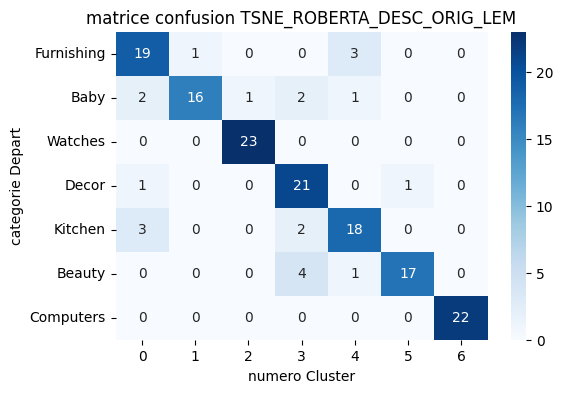

In [648]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.1.1.2 description** - nettoyée (lemmatisée)</span>

In [649]:
# Variable dont on veut extraire les features
data_work['desc_lem'] = \
    data_work['desc_lem'].fillna('').astype(str)
data_desc_lem = data_work['desc_lem']

In [650]:
type_donnee = 'TSNE_ROBERTA_DESC_LEM'

# Instanciation du modèle
bert_desc_lem = SentenceTransformer('roberta-large-nli-mean-tokens')

In [651]:
# Encodage
vector_roberta_desc_lem = \
    bert_desc_lem.encode(data_desc_lem, show_progress_bar=False)

In [654]:
# Réduction de dimension tsne
tsne_roberta_desc_lem = TSNE(verbose=1, perplexity=50, n_iter=5000)
X_proj_tsne_roberta_desc_lem = \
    tsne_roberta_desc_lem.fit_transform(vector_roberta_desc_lem)
# Dataframe pour clustering
df_tsne_roberta_desc_lem = pd.DataFrame({'VAR1' : X_proj_tsne_roberta_desc_lem[:, 0],
                                           'VAR2' : X_proj_tsne_roberta_desc_lem[:, 1],
                                           'CATEGORIE' : data_work['category']})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.004s...
[t-SNE] Computed neighbors for 1050 samples in 0.172s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 6.040918
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.387718
[t-SNE] KL divergence after 3150 iterations: 0.581791


**Jeu d'entrainement, et test**

In [655]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_roberta_desc_lem[cols], data_work.label, test_size=0.15, stratify=data_work.label, random_state=1944)

**Evaluation des modèles de classification supervisée**

**Algorithme KNN**

In [656]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.8969
Precision:
  - Macro: 0.8972
  - Micro: 0.8969
Recall:
  - Macro: 0.8967
  - Micro: 0.8969
F1-measure:
  - Macro: 0.8962
  - Micro: 0.8969


{'knn': {'micro_precision': 0.8968609865470852,
  'micro_recall': 0.8968609865470852,
  'micro_f1': 0.8968609865470852},
 'svm': {'micro_precision': 0.4405829596412556,
  'micro_recall': 0.4405829596412556,
  'micro_f1': 0.4405829596412556},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9708520179372198,
  'micro_recall': 0.9708520179372198,
  'micro_f1': 0.9708520179372198},
 'Naive Bayes': {'micro_precision': 0.6345291479820628,
  'micro_recall': 0.6345291479820628,
  'micro_f1': 0.6345291479820628},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Algorithme SVM**

In [657]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.3475
Precision:
  - Macro: 0.3046
  - Micro: 0.3475
Recall:
  - Macro: 0.3475
  - Micro: 0.3475
F1-measure:
  - Macro: 0.2980
  - Micro: 0.3475


{'knn': {'micro_precision': 0.8968609865470852,
  'micro_recall': 0.8968609865470852,
  'micro_f1': 0.8968609865470852},
 'svm': {'micro_precision': 0.3475336322869955,
  'micro_recall': 0.3475336322869955,
  'micro_f1': 0.3475336322869955},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9708520179372198,
  'micro_recall': 0.9708520179372198,
  'micro_f1': 0.9708520179372198},
 'Naive Bayes': {'micro_precision': 0.6345291479820628,
  'micro_recall': 0.6345291479820628,
  'micro_f1': 0.6345291479820628},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Algorithme RandomForest**

In [658]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8968609865470852,
  'micro_recall': 0.8968609865470852,
  'micro_f1': 0.8968609865470852},
 'svm': {'micro_precision': 0.3475336322869955,
  'micro_recall': 0.3475336322869955,
  'micro_f1': 0.3475336322869955},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9708520179372198,
  'micro_recall': 0.9708520179372198,
  'micro_f1': 0.9708520179372198},
 'Naive Bayes': {'micro_precision': 0.6345291479820628,
  'micro_recall': 0.6345291479820628,
  'micro_f1': 0.6345291479820628},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Algorithme Naive Bayes**

In [659]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.6177
Precision:
  - Macro: 0.6439
  - Micro: 0.6177
Recall:
  - Macro: 0.6174
  - Micro: 0.6177
F1-measure:
  - Macro: 0.6135
  - Micro: 0.6177


{'knn': {'micro_precision': 0.8968609865470852,
  'micro_recall': 0.8968609865470852,
  'micro_f1': 0.8968609865470852},
 'svm': {'micro_precision': 0.3475336322869955,
  'micro_recall': 0.3475336322869955,
  'micro_f1': 0.3475336322869955},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9708520179372198,
  'micro_recall': 0.9708520179372198,
  'micro_f1': 0.9708520179372198},
 'Naive Bayes': {'micro_precision': 0.6177130044843049,
  'micro_recall': 0.6177130044843049,
  'micro_f1': 0.6177130044843049},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Algorithme Gradient Boosting**

In [660]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9720
Precision:
  - Macro: 0.9731
  - Micro: 0.9720
Recall:
  - Macro: 0.9719
  - Micro: 0.9720
F1-measure:
  - Macro: 0.9719
  - Micro: 0.9720


{'knn': {'micro_precision': 0.8968609865470852,
  'micro_recall': 0.8968609865470852,
  'micro_f1': 0.8968609865470852},
 'svm': {'micro_precision': 0.3475336322869955,
  'micro_recall': 0.3475336322869955,
  'micro_f1': 0.3475336322869955},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9719730941704036,
  'micro_recall': 0.9719730941704036,
  'micro_f1': 0.9719730941704036},
 'Naive Bayes': {'micro_precision': 0.6177130044843049,
  'micro_recall': 0.6177130044843049,
  'micro_f1': 0.6177130044843049},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Extra Trees Classifier**

In [661]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8968609865470852,
  'micro_recall': 0.8968609865470852,
  'micro_f1': 0.8968609865470852},
 'svm': {'micro_precision': 0.3475336322869955,
  'micro_recall': 0.3475336322869955,
  'micro_f1': 0.3475336322869955},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9719730941704036,
  'micro_recall': 0.9719730941704036,
  'micro_f1': 0.9719730941704036},
 'Naive Bayes': {'micro_precision': 0.6177130044843049,
  'micro_recall': 0.6177130044843049,
  'micro_f1': 0.6177130044843049},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [662]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.896861,0.896861,0.896861
svm,0.347534,0.347534,0.347534
Random Forest,1.000000,1.000000,1.000000
Gradient Boosting,0.971973,0.971973,0.971973
Naive Bayes,0.617713,0.617713,0.617713
extra tree classifier,1.000000,1.000000,1.000000


On retient l'algo Extra Tree Classifier

**Entrainement du modèle**

In [663]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.861


In [664]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)
#test_labels = le.inverse_transform(y_test)
labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_desc_lem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_desc_lem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY TSNE_ROBERTA_DESC_LEM (Test): {:.3}".format(accuracy_tsne_roberta_desc_lem_test))
print("ACCURACY TSNE_ROBERTA_DESC_LEM (Train): {:.3}".format(accuracy_tsne_roberta_desc_lem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[21  0  1  0  1  0  0]
 [ 2 15  0  2  2  1  0]
 [ 0  0 22  1  0  0  0]
 [ 0  0  0 21  0  2  0]
 [ 5  0  0  1 17  0  0]
 [ 1  0  0  3  0 18  0]
 [ 0  0  0  0  0  0 22]]
Correspondance des clusters :  [0 1 2 3 4 5 6]
Correspondance des clusters :  [0 1 2 3 4 5 6]

ACCURACY TSNE_ROBERTA_DESC_LEM (Test): 0.861
ACCURACY TSNE_ROBERTA_DESC_LEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.72      0.91      0.81        23
           1       1.00      0.68      0.81        22
           2       0.96      0.96      0.96        23
           3       0.75      0.91      0.82        23
           4       0.85      0.74      0.79        23
           5       0.86      0.82      0.84        22
           6       1.00      1.00      1.00        22

    accuracy                           0.86       158
   macro avg       0.88      0.86      0.86       158
weighted avg       0.88      0.86      0.86       158



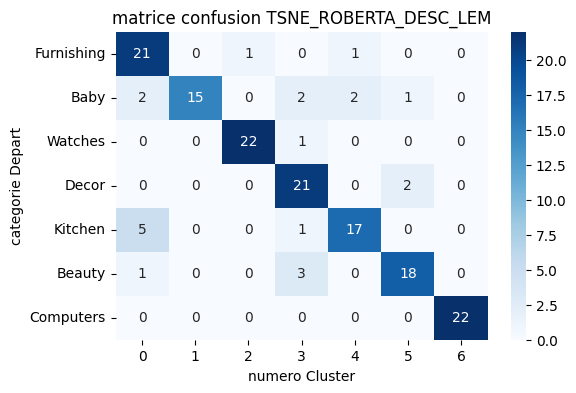

In [665]:
list_labels = ["Furnishing", "Baby", "Watches", "Decor", "Kitchen", \
               "Beauty", "Computers"]

df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.1.1.3 description** - nettoyée (racinisée)</span>

In [666]:
# Variable dont on veut extraire les features
data_work['desc_stem'] = \
    data_work['desc_stem'].fillna('').astype(str)
data_desc_stem = data_work['desc_stem']

In [667]:
type_donnee = 'TSNE_ROBERTA_DESC_STEM'

# Instanciation du modèle
bert_desc_stem = SentenceTransformer('roberta-large-nli-mean-tokens')

In [668]:
# Encodage
vector_roberta_desc_stem = \
    bert_desc_orig.encode(data_desc_stem, show_progress_bar=False)

In [670]:
# Réduction de dimension tsne
tsne_roberta_desc_stem = TSNE(verbose=1, perplexity=50, n_iter=5000)
X_proj_tsne_roberta_desc_stem = \
    tsne_roberta_desc_stem.fit_transform(vector_roberta_desc_stem)
# Dataframe pour clustering
df_tsne_roberta_desc_stem = pd.DataFrame({'VAR1' : X_proj_tsne_roberta_desc_stem[:, 0],
                                           'VAR2' : X_proj_tsne_roberta_desc_stem[:, 1],
                                           'CATEGORIE' : data_work['category']})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.000s...
[t-SNE] Computed neighbors for 1050 samples in 0.251s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 6.399504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.936996
[t-SNE] KL divergence after 3750 iterations: 0.635992


**Entrainement du modèle**

In [671]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_roberta_desc_stem[cols], data_work.label, test_size=0.15, stratify=data_work.label, random_state=1944)

In [672]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.9025
Precision:
  - Macro: 0.9031
  - Micro: 0.9025
Recall:
  - Macro: 0.9024
  - Micro: 0.9025
F1-measure:
  - Macro: 0.9022
  - Micro: 0.9025


{'knn': {'micro_precision': 0.9024663677130045,
  'micro_recall': 0.9024663677130045,
  'micro_f1': 0.9024663677130045},
 'svm': {'micro_precision': 0.3475336322869955,
  'micro_recall': 0.3475336322869955,
  'micro_f1': 0.3475336322869955},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9719730941704036,
  'micro_recall': 0.9719730941704036,
  'micro_f1': 0.9719730941704036},
 'Naive Bayes': {'micro_precision': 0.6177130044843049,
  'micro_recall': 0.6177130044843049,
  'micro_f1': 0.6177130044843049},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [673]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.4417
Precision:
  - Macro: 0.3350
  - Micro: 0.4417
Recall:
  - Macro: 0.4418
  - Micro: 0.4417
F1-measure:
  - Macro: 0.3626
  - Micro: 0.4417


{'knn': {'micro_precision': 0.9024663677130045,
  'micro_recall': 0.9024663677130045,
  'micro_f1': 0.9024663677130045},
 'svm': {'micro_precision': 0.44170403587443946,
  'micro_recall': 0.44170403587443946,
  'micro_f1': 0.44170403587443946},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9719730941704036,
  'micro_recall': 0.9719730941704036,
  'micro_f1': 0.9719730941704036},
 'Naive Bayes': {'micro_precision': 0.6177130044843049,
  'micro_recall': 0.6177130044843049,
  'micro_f1': 0.6177130044843049},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [674]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9024663677130045,
  'micro_recall': 0.9024663677130045,
  'micro_f1': 0.9024663677130045},
 'svm': {'micro_precision': 0.44170403587443946,
  'micro_recall': 0.44170403587443946,
  'micro_f1': 0.44170403587443946},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9719730941704036,
  'micro_recall': 0.9719730941704036,
  'micro_f1': 0.9719730941704036},
 'Naive Bayes': {'micro_precision': 0.6177130044843049,
  'micro_recall': 0.6177130044843049,
  'micro_f1': 0.6177130044843049},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [675]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.6121
Precision:
  - Macro: 0.6237
  - Micro: 0.6121
Recall:
  - Macro: 0.6119
  - Micro: 0.6121
F1-measure:
  - Macro: 0.6067
  - Micro: 0.6121


{'knn': {'micro_precision': 0.9024663677130045,
  'micro_recall': 0.9024663677130045,
  'micro_f1': 0.9024663677130045},
 'svm': {'micro_precision': 0.44170403587443946,
  'micro_recall': 0.44170403587443946,
  'micro_f1': 0.44170403587443946},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9719730941704036,
  'micro_recall': 0.9719730941704036,
  'micro_f1': 0.9719730941704036},
 'Naive Bayes': {'micro_precision': 0.6121076233183856,
  'micro_recall': 0.6121076233183856,
  'micro_f1': 0.6121076233183856},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [676]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9809
Precision:
  - Macro: 0.9810
  - Micro: 0.9809
Recall:
  - Macro: 0.9809
  - Micro: 0.9809
F1-measure:
  - Macro: 0.9809
  - Micro: 0.9809


{'knn': {'micro_precision': 0.9024663677130045,
  'micro_recall': 0.9024663677130045,
  'micro_f1': 0.9024663677130045},
 'svm': {'micro_precision': 0.44170403587443946,
  'micro_recall': 0.44170403587443946,
  'micro_f1': 0.44170403587443946},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9809417040358744,
  'micro_recall': 0.9809417040358744,
  'micro_f1': 0.9809417040358744},
 'Naive Bayes': {'micro_precision': 0.6121076233183856,
  'micro_recall': 0.6121076233183856,
  'micro_f1': 0.6121076233183856},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [677]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9024663677130045,
  'micro_recall': 0.9024663677130045,
  'micro_f1': 0.9024663677130045},
 'svm': {'micro_precision': 0.44170403587443946,
  'micro_recall': 0.44170403587443946,
  'micro_f1': 0.44170403587443946},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9809417040358744,
  'micro_recall': 0.9809417040358744,
  'micro_f1': 0.9809417040358744},
 'Naive Bayes': {'micro_precision': 0.6121076233183856,
  'micro_recall': 0.6121076233183856,
  'micro_f1': 0.6121076233183856},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [678]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.902466,0.902466,0.902466
svm,0.441704,0.441704,0.441704
Random Forest,1.000000,1.000000,1.000000
Gradient Boosting,0.980942,0.980942,0.980942
Naive Bayes,0.612108,0.612108,0.612108
extra tree classifier,1.000000,1.000000,1.000000


In [679]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.854


In [681]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)
#test_labels = le.inverse_transform(y_test)
labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_desc_lem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_desc_lem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY TSNE_ROBERTA_DESC_STEM (Test): {:.3}".format(accuracy_tsne_roberta_desc_lem_test))
print("ACCURACY TSNE_ROBERTA_DESC_STEM (Train): {:.3}".format(accuracy_tsne_roberta_desc_lem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[18  1  0  0  4  0  0]
 [ 1 16  1  1  2  1  0]
 [ 0  1 21  0  0  1  0]
 [ 2  1  0 20  0  0  0]
 [ 2  0  0  1 20  0  0]
 [ 1  0  2  1  0 18  0]
 [ 0  0  0  0  0  0 22]]
Correspondance des clusters :  [0 1 2 3 4 5 6]
Correspondance des clusters :  [0 1 2 3 4 5 6]

ACCURACY TSNE_ROBERTA_DESC_STEM (Test): 0.854
ACCURACY TSNE_ROBERTA_DESC_STEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.84      0.73      0.78        22
           2       0.88      0.91      0.89        23
           3       0.87      0.87      0.87        23
           4       0.77      0.87      0.82        23
           5       0.90      0.82      0.86        22
           6       1.00      1.00      1.00        22

    accuracy                           0.85       158
   macro avg       0.86      0.85      0.85       158
weighted avg       0.86      0.85      0.85       158



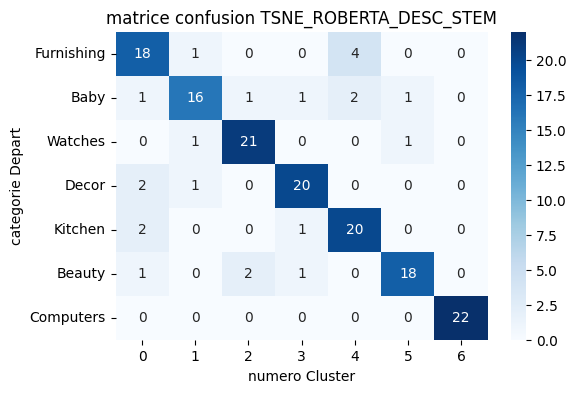

In [682]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.1.1.4 produit_specifications** - originale (non nettoyée)</span>

In [117]:
# Variable dont on veut extraire les features
data_work['product_specifications'] = \
    data_work['product_specifications'].fillna('').astype(str)
data_prods_orig = data_work['product_specifications']

type_donnee = 'TSNE_ROBERTA_PRODS_ORIG'

In [108]:
data_work.head(2)

,category,product_name,brand,image,product_category_tree,description,product_specifications,label,desc_clean,pname_clean,brand_clean,prod_spec_clean,desc_lem,pname_lem,brand_lem,prod_spec_lem,desc_stem,pname_stem,brand_stem,prod_spec_stem
0,Furnishing,Elegance Polyester Multicolor Abstract Eyelet ...,Elegance,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,"{""product_specification""=>[{""key""=>""Brand"", ""v...",4,key elegance polyester multicolor abstract eye...,elegance polyester multicolor abstract eyelet ...,elegance,product specification key brand value elegance...,key elegance polyester multicolor abstract eye...,elegance polyester multicolor abstract eyelet ...,elegance,product specification key brand value elegance...,key eleg polyest multicolor abstract eyelet do...,eleg polyest multicolor abstract eyelet door c...,eleg,product specif key brand valu eleg key valu do...
1,Baby,Sathiyas Cotton Bath Towel,Sathiyas,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,"{""product_specification""=>[{""key""=>""Machine Wa...",0,sathiyas cotton bath towel bath towel yellow b...,sathiyas cotton bath towel,sathiyas,product specification key machine washable val...,sathiyas cotton bath towel bath towel yellow b...,sathiyas cotton bath towel,sathiyas,product specification key machine washable val...,sathiya cotton bath towel bath towel yellow bl...,sathiya cotton bath towel,sathiya,product specif key machin washabl valu key mat...


In [684]:
# Instanciation du modèle
bert_prods_orig = SentenceTransformer('roberta-large-nli-mean-tokens')

# Encodage
vector_roberta_prods_orig = \
    bert_prods_orig.encode(data_prods_orig, show_progress_bar=False)

In [687]:
# Réduction de dimension tsne
tsne_roberta_prods_orig = TSNE(verbose=1, perplexity=50, n_iter=5000)
X_proj_tsne_roberta_prods_orig = \
    tsne_roberta_prods_orig.fit_transform(vector_roberta_prods_orig)
# Dataframe pour clustering
df_tsne_roberta_prods_orig = pd.DataFrame({'VAR1' : X_proj_tsne_roberta_prods_orig[:, 0],
                                           'VAR2' : X_proj_tsne_roberta_prods_orig[:, 1],
                                           'CATEGORIE' : data_work['category']})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.002s...
[t-SNE] Computed neighbors for 1050 samples in 0.070s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 6.637494
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.342308
[t-SNE] KL divergence after 2500 iterations: 0.790125


In [688]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_roberta_prods_orig[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [689]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.8988
Precision:
  - Macro: 0.8997
  - Micro: 0.8988
Recall:
  - Macro: 0.8988
  - Micro: 0.8988
F1-measure:
  - Macro: 0.8987
  - Micro: 0.8988


{'knn': {'micro_precision': 0.8988095238095238,
  'micro_recall': 0.8988095238095238,
  'micro_f1': 0.8988095238095238},
 'svm': {'micro_precision': 0.44170403587443946,
  'micro_recall': 0.44170403587443946,
  'micro_f1': 0.44170403587443946},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9809417040358744,
  'micro_recall': 0.9809417040358744,
  'micro_f1': 0.9809417040358744},
 'Naive Bayes': {'micro_precision': 0.6121076233183856,
  'micro_recall': 0.6121076233183856,
  'micro_f1': 0.6121076233183856},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [690]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.5024
Precision:
  - Macro: 0.4611
  - Micro: 0.5024
Recall:
  - Macro: 0.5024
  - Micro: 0.5024
F1-measure:
  - Macro: 0.4474
  - Micro: 0.5024


{'knn': {'micro_precision': 0.8988095238095238,
  'micro_recall': 0.8988095238095238,
  'micro_f1': 0.8988095238095238},
 'svm': {'micro_precision': 0.5023809523809524,
  'micro_recall': 0.5023809523809524,
  'micro_f1': 0.5023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9809417040358744,
  'micro_recall': 0.9809417040358744,
  'micro_f1': 0.9809417040358744},
 'Naive Bayes': {'micro_precision': 0.6121076233183856,
  'micro_recall': 0.6121076233183856,
  'micro_f1': 0.6121076233183856},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [691]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8988095238095238,
  'micro_recall': 0.8988095238095238,
  'micro_f1': 0.8988095238095238},
 'svm': {'micro_precision': 0.5023809523809524,
  'micro_recall': 0.5023809523809524,
  'micro_f1': 0.5023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9809417040358744,
  'micro_recall': 0.9809417040358744,
  'micro_f1': 0.9809417040358744},
 'Naive Bayes': {'micro_precision': 0.6121076233183856,
  'micro_recall': 0.6121076233183856,
  'micro_f1': 0.6121076233183856},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [692]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.7083
Precision:
  - Macro: 0.7121
  - Micro: 0.7083
Recall:
  - Macro: 0.7083
  - Micro: 0.7083
F1-measure:
  - Macro: 0.7056
  - Micro: 0.7083


{'knn': {'micro_precision': 0.8988095238095238,
  'micro_recall': 0.8988095238095238,
  'micro_f1': 0.8988095238095238},
 'svm': {'micro_precision': 0.5023809523809524,
  'micro_recall': 0.5023809523809524,
  'micro_f1': 0.5023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9809417040358744,
  'micro_recall': 0.9809417040358744,
  'micro_f1': 0.9809417040358744},
 'Naive Bayes': {'micro_precision': 0.7083333333333334,
  'micro_recall': 0.7083333333333334,
  'micro_f1': 0.7083333333333334},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [693]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9762
Precision:
  - Macro: 0.9768
  - Micro: 0.9762
Recall:
  - Macro: 0.9762
  - Micro: 0.9762
F1-measure:
  - Macro: 0.9764
  - Micro: 0.9762


{'knn': {'micro_precision': 0.8988095238095238,
  'micro_recall': 0.8988095238095238,
  'micro_f1': 0.8988095238095238},
 'svm': {'micro_precision': 0.5023809523809524,
  'micro_recall': 0.5023809523809524,
  'micro_f1': 0.5023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9761904761904762,
  'micro_recall': 0.9761904761904762,
  'micro_f1': 0.9761904761904762},
 'Naive Bayes': {'micro_precision': 0.7083333333333334,
  'micro_recall': 0.7083333333333334,
  'micro_f1': 0.7083333333333334},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [694]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8988095238095238,
  'micro_recall': 0.8988095238095238,
  'micro_f1': 0.8988095238095238},
 'svm': {'micro_precision': 0.5023809523809524,
  'micro_recall': 0.5023809523809524,
  'micro_f1': 0.5023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Gradient Boosting': {'micro_precision': 0.9761904761904762,
  'micro_recall': 0.9761904761904762,
  'micro_f1': 0.9761904761904762},
 'Naive Bayes': {'micro_precision': 0.7083333333333334,
  'micro_recall': 0.7083333333333334,
  'micro_f1': 0.7083333333333334},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [695]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.898810,0.898810,0.898810
svm,0.502381,0.502381,0.502381
Random Forest,1.000000,1.000000,1.000000
Gradient Boosting,0.976190,0.976190,0.976190
Naive Bayes,0.708333,0.708333,0.708333
extra tree classifier,1.000000,1.000000,1.000000


In [696]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.838


In [698]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)
#test_labels = le.inverse_transform(y_test)
labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_desc_lem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_desc_lem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_desc_lem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_desc_lem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[22  2  0  0  5  1  0]
 [ 1 22  3  1  0  3  0]
 [ 0  1 27  0  0  2  0]
 [ 0  1  0 27  1  1  0]
 [ 5  0  0  1 24  0  0]
 [ 0  0  1  3  0 26  0]
 [ 0  0  0  2  0  0 28]]
Correspondance des clusters :  [0 1 2 3 4 5 6]
Correspondance des clusters :  [0 1 2 3 4 5 6]

ACCURACY TSNE_ROBERTA_PRODS_ORIG (Test): 0.838
ACCURACY TSNE_ROBERTA_PRODS_ORIG (Train): 1.0


              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.85      0.73      0.79        30
           2       0.87      0.90      0.89        30
           3       0.79      0.90      0.84        30
           4       0.80      0.80      0.80        30
           5       0.79      0.87      0.83        30
           6       1.00      0.93      0.97        30

    accuracy                           0.84       210
   macro avg       0.84      0.84      0.84       210
weighted avg       0.84      0.84      0.84       210



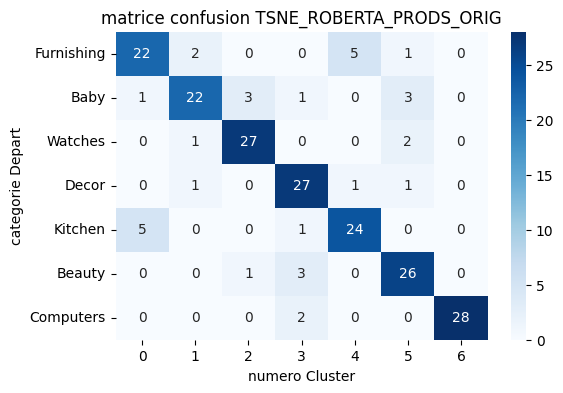

In [699]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.1.1.5 product_specifications** - nettoyé (non racinisé et non lemmatisé)</span>

In [27]:
# Variable dont on veut extraire les features
data_work['prod_spec_clean'] = \
    data_work['prod_spec_clean'].fillna('').astype(str)
data_prods_clean = data_work['prod_spec_clean']

In [28]:
type_donnee = 'TSNE_ROBERTA_PRODS_CLEAN'

# Instanciation du modèle
bert_prods_clean = SentenceTransformer('roberta-large-nli-mean-tokens')

# Encodage
vector_roberta_prods_clean = \
    bert_prods_clean.encode(data_prods_clean, show_progress_bar=False)

In [30]:
# Réduction de dimension tsne
tsne_roberta_prods_clean = TSNE(verbose=1, perplexity=50, n_iter=5000)
X_proj_tsne_roberta_prods_clean = \
    tsne_roberta_prods_clean.fit_transform(vector_roberta_prods_clean)
# Dataframe pour clustering
df_tsne_roberta_prods_clean = pd.DataFrame({'VAR1' : X_proj_tsne_roberta_prods_clean[:, 0],
                                           'VAR2' : X_proj_tsne_roberta_prods_clean[:, 1],
                                           'CATEGORIE' : data_work['category']})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.003s...
[t-SNE] Computed neighbors for 1050 samples in 0.082s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 7.370405
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.607796
[t-SNE] KL divergence after 2350 iterations: 0.668781


**Entrainement du modèle**

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_roberta_prods_clean[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [36]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.8857
Precision:
  - Macro: 0.8878
  - Micro: 0.8857
Recall:
  - Macro: 0.8857
  - Micro: 0.8857
F1-measure:
  - Macro: 0.8852
  - Micro: 0.8857


{'knn': {'micro_precision': 0.8857142857142857,
  'micro_recall': 0.8857142857142857,
  'micro_f1': 0.8857142857142857}}

In [37]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.6262
Precision:
  - Macro: 0.5836
  - Micro: 0.6262
Recall:
  - Macro: 0.6262
  - Micro: 0.6262
F1-measure:
  - Macro: 0.5700
  - Micro: 0.6262


{'knn': {'micro_precision': 0.8857142857142857,
  'micro_recall': 0.8857142857142857,
  'micro_f1': 0.8857142857142857},
 'svm': {'micro_precision': 0.6261904761904762,
  'micro_recall': 0.6261904761904762,
  'micro_f1': 0.6261904761904762}}

In [38]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8857142857142857,
  'micro_recall': 0.8857142857142857,
  'micro_f1': 0.8857142857142857},
 'svm': {'micro_precision': 0.6261904761904762,
  'micro_recall': 0.6261904761904762,
  'micro_f1': 0.6261904761904762},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [39]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.8024
Precision:
  - Macro: 0.8043
  - Micro: 0.8024
Recall:
  - Macro: 0.8024
  - Micro: 0.8024
F1-measure:
  - Macro: 0.8022
  - Micro: 0.8024


{'knn': {'micro_precision': 0.8857142857142857,
  'micro_recall': 0.8857142857142857,
  'micro_f1': 0.8857142857142857},
 'svm': {'micro_precision': 0.6261904761904762,
  'micro_recall': 0.6261904761904762,
  'micro_f1': 0.6261904761904762},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.8023809523809524,
  'micro_recall': 0.8023809523809524,
  'micro_f1': 0.8023809523809524}}

In [40]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9762
Precision:
  - Macro: 0.9768
  - Micro: 0.9762
Recall:
  - Macro: 0.9762
  - Micro: 0.9762
F1-measure:
  - Macro: 0.9761
  - Micro: 0.9762


{'knn': {'micro_precision': 0.8857142857142857,
  'micro_recall': 0.8857142857142857,
  'micro_f1': 0.8857142857142857},
 'svm': {'micro_precision': 0.6261904761904762,
  'micro_recall': 0.6261904761904762,
  'micro_f1': 0.6261904761904762},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.8023809523809524,
  'micro_recall': 0.8023809523809524,
  'micro_f1': 0.8023809523809524},
 'Gradient Boosting': {'micro_precision': 0.9761904761904762,
  'micro_recall': 0.9761904761904762,
  'micro_f1': 0.9761904761904762}}

In [41]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8857142857142857,
  'micro_recall': 0.8857142857142857,
  'micro_f1': 0.8857142857142857},
 'svm': {'micro_precision': 0.6261904761904762,
  'micro_recall': 0.6261904761904762,
  'micro_f1': 0.6261904761904762},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.8023809523809524,
  'micro_recall': 0.8023809523809524,
  'micro_f1': 0.8023809523809524},
 'Gradient Boosting': {'micro_precision': 0.9761904761904762,
  'micro_recall': 0.9761904761904762,
  'micro_f1': 0.9761904761904762},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [42]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.885714,0.885714,0.885714
svm,0.626190,0.626190,0.626190
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.802381,0.802381,0.802381
Gradient Boosting,0.976190,0.976190,0.976190
extra tree classifier,1.000000,1.000000,1.000000


In [43]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.881


In [51]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)
#test_labels = le.inverse_transform(y_test)
labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_prods_clean_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_prods_clean_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_prods_clean_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_prods_clean_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[23  1  1  0  5  0  0]
 [ 0 24  2  1  0  1  2]
 [ 1  0 28  0  1  0  0]
 [ 0  0  0 27  0  3  0]
 [ 2  0  0  2 26  0  0]
 [ 0  0  0  2  0 27  1]
 [ 0  0  0  0  0  0 30]]

ACCURACY TSNE_ROBERTA_PRODS_CLEAN (Test): 0.881
ACCURACY TSNE_ROBERTA_PRODS_CLEAN (Train): 1.0


              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.96      0.80      0.87        30
           2       0.90      0.93      0.92        30
           3       0.84      0.90      0.87        30
           4       0.81      0.87      0.84        30
           5       0.87      0.90      0.89        30
           6       0.91      1.00      0.95        30

    accuracy                           0.88       210
   macro avg       0.88      0.88      0.88       210
weighted avg       0.88      0.88      0.88       210



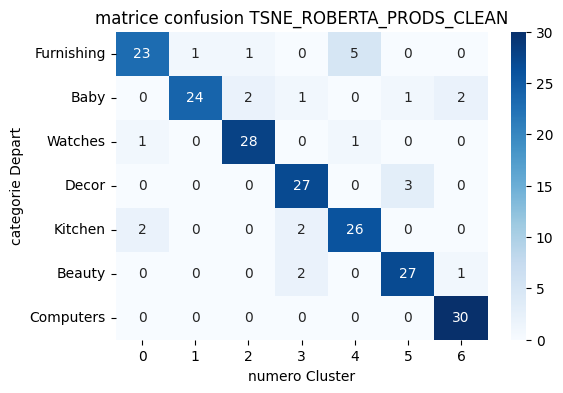

In [55]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.1.1.6  produit_specifications** - nettoyée (lemmatisée)</span>

In [57]:
# Variable dont on veut extraire les features
data_work['prod_spec_lem'] = \
    data_work['prod_spec_lem'].fillna('').astype(str)
data_prods_lem = data_work['prod_spec_lem']

In [58]:
type_donnee = 'TSNE_ROBERTA_PRODS_LEM'

# Instanciation du modèle
bert_prods_lem = SentenceTransformer('roberta-large-nli-mean-tokens')

# Encodage
vector_roberta_prods_lem = \
    bert_prods_lem.encode(data_prods_lem, show_progress_bar=False)

In [60]:
# Réduction de dimension tsne
tsne_roberta_prods_lem = TSNE(verbose=1, perplexity=50, n_iter=5000)
X_proj_tsne_roberta_prods_lem = \
    tsne_roberta_prods_lem.fit_transform(vector_roberta_prods_lem)
# Dataframe pour clustering
df_tsne_roberta_prods_lem = pd.DataFrame({'VAR1' : X_proj_tsne_roberta_prods_lem[:, 0],
                                           'VAR2' : X_proj_tsne_roberta_prods_lem[:, 1],
                                           'CATEGORIE' : data_work['category']})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.002s...
[t-SNE] Computed neighbors for 1050 samples in 0.071s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 7.370405
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.607830
[t-SNE] KL divergence after 3550 iterations: 0.668928


**Entrainement du modèle**

In [62]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_roberta_prods_lem[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [63]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.8869
Precision:
  - Macro: 0.8900
  - Micro: 0.8869
Recall:
  - Macro: 0.8869
  - Micro: 0.8869
F1-measure:
  - Macro: 0.8865
  - Micro: 0.8869


{'knn': {'micro_precision': 0.8869047619047619,
  'micro_recall': 0.8869047619047619,
  'micro_f1': 0.8869047619047619}}

In [64]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.5417
Precision:
  - Macro: 0.6515
  - Micro: 0.5417
Recall:
  - Macro: 0.5417
  - Micro: 0.5417
F1-measure:
  - Macro: 0.5133
  - Micro: 0.5417


{'knn': {'micro_precision': 0.8869047619047619,
  'micro_recall': 0.8869047619047619,
  'micro_f1': 0.8869047619047619},
 'svm': {'micro_precision': 0.5416666666666666,
  'micro_recall': 0.5416666666666666,
  'micro_f1': 0.5416666666666666}}

In [65]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8869047619047619,
  'micro_recall': 0.8869047619047619,
  'micro_f1': 0.8869047619047619},
 'svm': {'micro_precision': 0.5416666666666666,
  'micro_recall': 0.5416666666666666,
  'micro_f1': 0.5416666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [66]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.8071
Precision:
  - Macro: 0.8103
  - Micro: 0.8071
Recall:
  - Macro: 0.8071
  - Micro: 0.8071
F1-measure:
  - Macro: 0.8073
  - Micro: 0.8071


{'knn': {'micro_precision': 0.8869047619047619,
  'micro_recall': 0.8869047619047619,
  'micro_f1': 0.8869047619047619},
 'svm': {'micro_precision': 0.5416666666666666,
  'micro_recall': 0.5416666666666666,
  'micro_f1': 0.5416666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.8071428571428572,
  'micro_recall': 0.8071428571428572,
  'micro_f1': 0.8071428571428572}}

In [67]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9714
Precision:
  - Macro: 0.9719
  - Micro: 0.9714
Recall:
  - Macro: 0.9714
  - Micro: 0.9714
F1-measure:
  - Macro: 0.9713
  - Micro: 0.9714


{'knn': {'micro_precision': 0.8869047619047619,
  'micro_recall': 0.8869047619047619,
  'micro_f1': 0.8869047619047619},
 'svm': {'micro_precision': 0.5416666666666666,
  'micro_recall': 0.5416666666666666,
  'micro_f1': 0.5416666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.8071428571428572,
  'micro_recall': 0.8071428571428572,
  'micro_f1': 0.8071428571428572},
 'Gradient Boosting': {'micro_precision': 0.9714285714285714,
  'micro_recall': 0.9714285714285714,
  'micro_f1': 0.9714285714285714}}

In [68]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8869047619047619,
  'micro_recall': 0.8869047619047619,
  'micro_f1': 0.8869047619047619},
 'svm': {'micro_precision': 0.5416666666666666,
  'micro_recall': 0.5416666666666666,
  'micro_f1': 0.5416666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.8071428571428572,
  'micro_recall': 0.8071428571428572,
  'micro_f1': 0.8071428571428572},
 'Gradient Boosting': {'micro_precision': 0.9714285714285714,
  'micro_recall': 0.9714285714285714,
  'micro_f1': 0.9714285714285714},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [69]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.886905,0.886905,0.886905
svm,0.541667,0.541667,0.541667
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.807143,0.807143,0.807143
Gradient Boosting,0.971429,0.971429,0.971429
extra tree classifier,1.000000,1.000000,1.000000


In [70]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.857


In [72]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)
#test_labels = le.inverse_transform(y_test)
labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_prods_lem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_prods_lem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_prods_lem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_prods_lem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[23  1  1  0  5  0  0]
 [ 0 24  2  1  0  2  1]
 [ 1  0 28  0  1  0  0]
 [ 0  0  0 25  1  4  0]
 [ 2  0  0  2 26  0  0]
 [ 0  0  0  2  0 27  1]
 [ 0  0  0  3  0  0 27]]
Correspondance des clusters :  [0 1 2 3 4 5 6]
Correspondance des clusters :  [0 1 2 3 4 5 6]

ACCURACY TSNE_ROBERTA_PRODS_LEM (Test): 0.857
ACCURACY TSNE_ROBERTA_PRODS_LEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.96      0.80      0.87        30
           2       0.90      0.93      0.92        30
           3       0.76      0.83      0.79        30
           4       0.79      0.87      0.83        30
           5       0.82      0.90      0.86        30
           6       0.93      0.90      0.92        30

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.86      0.86      0.86       210



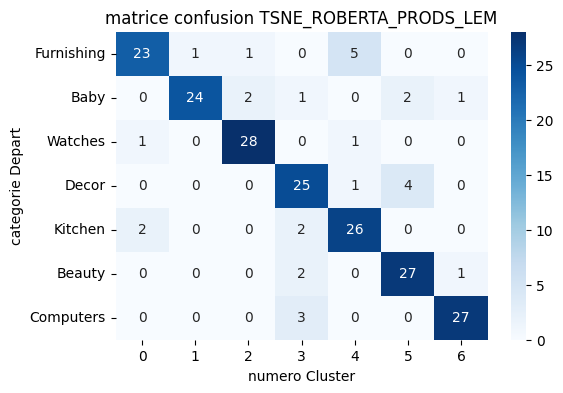

In [73]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.1.1.7   product_specifications** - stemmatisé</span>

In [74]:
# Variable dont on veut extraire les features
data_work['prod_spec_stem'] = \
    data_work['prod_spec_stem'].fillna('').astype(str)
data_prods_stem = data_work['prod_spec_stem']

In [75]:
type_donnee = 'TSNE_ROBERTA_PRODS_STEM'

# Instanciation du modèle
bert_prods_stem = SentenceTransformer('roberta-large-nli-mean-tokens')

# Encodage
vector_roberta_prods_stem = \
    bert_prods_stem.encode(data_prods_stem, show_progress_bar=False)

In [77]:
# Réduction de dimension tsne
tsne_roberta_prods_stem = TSNE(verbose=1, perplexity=50, n_iter=5000)
X_proj_tsne_roberta_prods_stem = \
    tsne_roberta_prods_stem.fit_transform(vector_roberta_prods_stem)
# Dataframe pour clustering
df_tsne_roberta_prods_stem = pd.DataFrame({'VAR1' : X_proj_tsne_roberta_prods_stem[:, 0],
                                           'VAR2' : X_proj_tsne_roberta_prods_stem[:, 1],
                                           'CATEGORIE' : data_work['category']})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.002s...
[t-SNE] Computed neighbors for 1050 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 6.761661
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.695503
[t-SNE] KL divergence after 5000 iterations: 0.699418


**Entrainement du modèle**

In [79]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_roberta_prods_stem[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [80]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.8702
Precision:
  - Macro: 0.8712
  - Micro: 0.8702
Recall:
  - Macro: 0.8702
  - Micro: 0.8702
F1-measure:
  - Macro: 0.8701
  - Micro: 0.8702


{'knn': {'micro_precision': 0.8702380952380953,
  'micro_recall': 0.8702380952380953,
  'micro_f1': 0.8702380952380953},
 'svm': {'micro_precision': 0.5416666666666666,
  'micro_recall': 0.5416666666666666,
  'micro_f1': 0.5416666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.8071428571428572,
  'micro_recall': 0.8071428571428572,
  'micro_f1': 0.8071428571428572},
 'Gradient Boosting': {'micro_precision': 0.9714285714285714,
  'micro_recall': 0.9714285714285714,
  'micro_f1': 0.9714285714285714},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [81]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.5024
Precision:
  - Macro: 0.4679
  - Micro: 0.5024
Recall:
  - Macro: 0.5024
  - Micro: 0.5024
F1-measure:
  - Macro: 0.4309
  - Micro: 0.5024


{'knn': {'micro_precision': 0.8702380952380953,
  'micro_recall': 0.8702380952380953,
  'micro_f1': 0.8702380952380953},
 'svm': {'micro_precision': 0.5023809523809524,
  'micro_recall': 0.5023809523809524,
  'micro_f1': 0.5023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.8071428571428572,
  'micro_recall': 0.8071428571428572,
  'micro_f1': 0.8071428571428572},
 'Gradient Boosting': {'micro_precision': 0.9714285714285714,
  'micro_recall': 0.9714285714285714,
  'micro_f1': 0.9714285714285714},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [82]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8702380952380953,
  'micro_recall': 0.8702380952380953,
  'micro_f1': 0.8702380952380953},
 'svm': {'micro_precision': 0.5023809523809524,
  'micro_recall': 0.5023809523809524,
  'micro_f1': 0.5023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.8071428571428572,
  'micro_recall': 0.8071428571428572,
  'micro_f1': 0.8071428571428572},
 'Gradient Boosting': {'micro_precision': 0.9714285714285714,
  'micro_recall': 0.9714285714285714,
  'micro_f1': 0.9714285714285714},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [83]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.7560
Precision:
  - Macro: 0.7565
  - Micro: 0.7560
Recall:
  - Macro: 0.7560
  - Micro: 0.7560
F1-measure:
  - Macro: 0.7547
  - Micro: 0.7560


{'knn': {'micro_precision': 0.8702380952380953,
  'micro_recall': 0.8702380952380953,
  'micro_f1': 0.8702380952380953},
 'svm': {'micro_precision': 0.5023809523809524,
  'micro_recall': 0.5023809523809524,
  'micro_f1': 0.5023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7559523809523809,
  'micro_recall': 0.7559523809523809,
  'micro_f1': 0.7559523809523809},
 'Gradient Boosting': {'micro_precision': 0.9714285714285714,
  'micro_recall': 0.9714285714285714,
  'micro_f1': 0.9714285714285714},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [84]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9667
Precision:
  - Macro: 0.9676
  - Micro: 0.9667
Recall:
  - Macro: 0.9667
  - Micro: 0.9667
F1-measure:
  - Macro: 0.9667
  - Micro: 0.9667


{'knn': {'micro_precision': 0.8702380952380953,
  'micro_recall': 0.8702380952380953,
  'micro_f1': 0.8702380952380953},
 'svm': {'micro_precision': 0.5023809523809524,
  'micro_recall': 0.5023809523809524,
  'micro_f1': 0.5023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7559523809523809,
  'micro_recall': 0.7559523809523809,
  'micro_f1': 0.7559523809523809},
 'Gradient Boosting': {'micro_precision': 0.9666666666666667,
  'micro_recall': 0.9666666666666667,
  'micro_f1': 0.9666666666666667},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [85]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8702380952380953,
  'micro_recall': 0.8702380952380953,
  'micro_f1': 0.8702380952380953},
 'svm': {'micro_precision': 0.5023809523809524,
  'micro_recall': 0.5023809523809524,
  'micro_f1': 0.5023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7559523809523809,
  'micro_recall': 0.7559523809523809,
  'micro_f1': 0.7559523809523809},
 'Gradient Boosting': {'micro_precision': 0.9666666666666667,
  'micro_recall': 0.9666666666666667,
  'micro_f1': 0.9666666666666667},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [86]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.870238,0.870238,0.870238
svm,0.502381,0.502381,0.502381
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.755952,0.755952,0.755952
Gradient Boosting,0.966667,0.966667,0.966667
extra tree classifier,1.000000,1.000000,1.000000


In [87]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.848


In [89]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)
#test_labels = le.inverse_transform(y_test)
labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_prods_stem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_prods_stem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_prods_stem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_prods_stem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[23  1  0  1  5  0  0]
 [ 1 22  2  0  1  2  2]
 [ 0  0 28  1  0  1  0]
 [ 2  1  1 23  1  1  1]
 [ 4  0  0  3 23  0  0]
 [ 0  0  0  1  0 29  0]
 [ 0  0  0  0  0  0 30]]
Correspondance des clusters :  [0 1 2 3 4 5 6]
Correspondance des clusters :  [0 1 2 3 4 5 6]

ACCURACY TSNE_ROBERTA_PRODS_STEM (Test): 0.848
ACCURACY TSNE_ROBERTA_PRODS_STEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.92      0.73      0.81        30
           2       0.90      0.93      0.92        30
           3       0.79      0.77      0.78        30
           4       0.77      0.77      0.77        30
           5       0.88      0.97      0.92        30
           6       0.91      1.00      0.95        30

    accuracy                           0.85       210
   macro avg       0.85      0.85      0.85       210
weighted avg       0.85      0.85      0.85       210



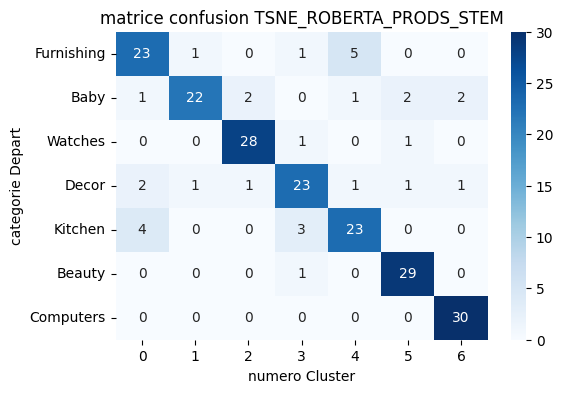

In [90]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.1.1.8  product_name** - original (non nettoyé)</span>

In [91]:
# Variable dont on veut extraire les features
data_work['product_name'] = \
    data_work['product_name'].fillna('').astype(str)
data_prod_orig = data_work['product_name']

In [92]:
type_donnee = 'TSNE_ROBERTA_PROD_ORIG'

# Instanciation du modèle
bert_prod_orig = SentenceTransformer('roberta-large-nli-mean-tokens')

# Encodage
vector_roberta_prod_orig = \
    bert_prod_orig.encode(data_prod_orig, show_progress_bar=False)

In [94]:
# Réduction de dimension tsne
tsne_roberta_prod_orig = TSNE(verbose=1, perplexity=50, n_iter=5000)
X_proj_tsne_roberta_prod_orig = \
    tsne_roberta_prod_orig.fit_transform(vector_roberta_prod_orig)
# Dataframe pour clustering
df_tsne_roberta_prod_orig = pd.DataFrame({'VAR1' : X_proj_tsne_roberta_prod_orig[:, 0],
                                           'VAR2' : X_proj_tsne_roberta_prod_orig[:, 1],
                                           'CATEGORIE' : data_work['category']})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.002s...
[t-SNE] Computed neighbors for 1050 samples in 0.073s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 9.775567
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.976471
[t-SNE] KL divergence after 5000 iterations: 0.830490


**Entrainement du modèle**

In [95]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_roberta_prod_orig[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [96]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.8869
Precision:
  - Macro: 0.8870
  - Micro: 0.8869
Recall:
  - Macro: 0.8869
  - Micro: 0.8869
F1-measure:
  - Macro: 0.8863
  - Micro: 0.8869


{'knn': {'micro_precision': 0.8869047619047619,
  'micro_recall': 0.8869047619047619,
  'micro_f1': 0.8869047619047619},
 'svm': {'micro_precision': 0.5023809523809524,
  'micro_recall': 0.5023809523809524,
  'micro_f1': 0.5023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7559523809523809,
  'micro_recall': 0.7559523809523809,
  'micro_f1': 0.7559523809523809},
 'Gradient Boosting': {'micro_precision': 0.9666666666666667,
  'micro_recall': 0.9666666666666667,
  'micro_f1': 0.9666666666666667},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [97]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.5417
Precision:
  - Macro: 0.5317
  - Micro: 0.5417
Recall:
  - Macro: 0.5417
  - Micro: 0.5417
F1-measure:
  - Macro: 0.4844
  - Micro: 0.5417


{'knn': {'micro_precision': 0.8869047619047619,
  'micro_recall': 0.8869047619047619,
  'micro_f1': 0.8869047619047619},
 'svm': {'micro_precision': 0.5416666666666666,
  'micro_recall': 0.5416666666666666,
  'micro_f1': 0.5416666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7559523809523809,
  'micro_recall': 0.7559523809523809,
  'micro_f1': 0.7559523809523809},
 'Gradient Boosting': {'micro_precision': 0.9666666666666667,
  'micro_recall': 0.9666666666666667,
  'micro_f1': 0.9666666666666667},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [98]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8869047619047619,
  'micro_recall': 0.8869047619047619,
  'micro_f1': 0.8869047619047619},
 'svm': {'micro_precision': 0.5416666666666666,
  'micro_recall': 0.5416666666666666,
  'micro_f1': 0.5416666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7559523809523809,
  'micro_recall': 0.7559523809523809,
  'micro_f1': 0.7559523809523809},
 'Gradient Boosting': {'micro_precision': 0.9666666666666667,
  'micro_recall': 0.9666666666666667,
  'micro_f1': 0.9666666666666667},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [99]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.6548
Precision:
  - Macro: 0.6274
  - Micro: 0.6548
Recall:
  - Macro: 0.6548
  - Micro: 0.6548
F1-measure:
  - Macro: 0.6022
  - Micro: 0.6548


{'knn': {'micro_precision': 0.8869047619047619,
  'micro_recall': 0.8869047619047619,
  'micro_f1': 0.8869047619047619},
 'svm': {'micro_precision': 0.5416666666666666,
  'micro_recall': 0.5416666666666666,
  'micro_f1': 0.5416666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6547619047619048,
  'micro_recall': 0.6547619047619048,
  'micro_f1': 0.6547619047619048},
 'Gradient Boosting': {'micro_precision': 0.9666666666666667,
  'micro_recall': 0.9666666666666667,
  'micro_f1': 0.9666666666666667},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [100]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9810
Precision:
  - Macro: 0.9812
  - Micro: 0.9810
Recall:
  - Macro: 0.9810
  - Micro: 0.9810
F1-measure:
  - Macro: 0.9809
  - Micro: 0.9810


{'knn': {'micro_precision': 0.8869047619047619,
  'micro_recall': 0.8869047619047619,
  'micro_f1': 0.8869047619047619},
 'svm': {'micro_precision': 0.5416666666666666,
  'micro_recall': 0.5416666666666666,
  'micro_f1': 0.5416666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6547619047619048,
  'micro_recall': 0.6547619047619048,
  'micro_f1': 0.6547619047619048},
 'Gradient Boosting': {'micro_precision': 0.9809523809523809,
  'micro_recall': 0.9809523809523809,
  'micro_f1': 0.9809523809523809},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [101]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8869047619047619,
  'micro_recall': 0.8869047619047619,
  'micro_f1': 0.8869047619047619},
 'svm': {'micro_precision': 0.5416666666666666,
  'micro_recall': 0.5416666666666666,
  'micro_f1': 0.5416666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6547619047619048,
  'micro_recall': 0.6547619047619048,
  'micro_f1': 0.6547619047619048},
 'Gradient Boosting': {'micro_precision': 0.9809523809523809,
  'micro_recall': 0.9809523809523809,
  'micro_f1': 0.9809523809523809},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [102]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.886905,0.886905,0.886905
svm,0.541667,0.541667,0.541667
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.654762,0.654762,0.654762
Gradient Boosting,0.980952,0.980952,0.980952
extra tree classifier,1.000000,1.000000,1.000000


In [103]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.852


In [105]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)
#test_labels = le.inverse_transform(y_test)
labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_prod_orig_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_prod_orig_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_prod_orig_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_prod_orig_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[24  2  0  0  4  0  0]
 [ 2 21  2  0  3  2  0]
 [ 0  0 28  0  0  1  1]
 [ 0  1  0 27  0  2  0]
 [ 6  0  0  0 24  0  0]
 [ 2  1  0  2  0 25  0]
 [ 0  0  0  0  0  0 30]]
Correspondance des clusters :  [0 1 2 3 4 5 6]
Correspondance des clusters :  [0 1 2 3 4 5 6]

ACCURACY TSNE_ROBERTA_PROD_ORIG (Test): 0.852
ACCURACY TSNE_ROBERTA_PROD_ORIG (Train): 1.0


              precision    recall  f1-score   support

           0       0.71      0.80      0.75        30
           1       0.84      0.70      0.76        30
           2       0.93      0.93      0.93        30
           3       0.93      0.90      0.92        30
           4       0.77      0.80      0.79        30
           5       0.83      0.83      0.83        30
           6       0.97      1.00      0.98        30

    accuracy                           0.85       210
   macro avg       0.86      0.85      0.85       210
weighted avg       0.86      0.85      0.85       210



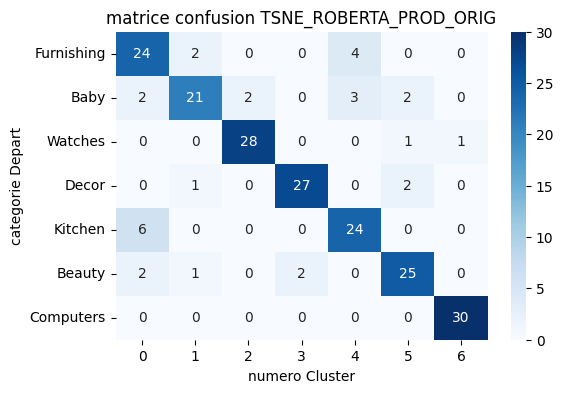

In [106]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.1.1.9  product_name** - lemmatisé</span>

In [72]:
# Variable dont on veut extraire les features
data_work['pname_lem'] = \
    data_work['pname_lem'].fillna('').astype(str)
data_prod_lem = data_work['pname_lem']

In [109]:
type_donnee = 'TSNE_ROBERTA_PROD_LEM'

# Instanciation du modèle
bert_prod_lem = SentenceTransformer('roberta-large-nli-mean-tokens')

# Encodage
vector_roberta_prod_lem = \
    bert_prod_lem.encode(data_prod_lem, show_progress_bar=False)

In [111]:
# Réduction de dimension tsne
tsne_roberta_prod_lem = TSNE(verbose=1, perplexity=50, n_iter=5000)
X_proj_tsne_roberta_prod_lem = \
    tsne_roberta_prod_lem.fit_transform(vector_roberta_prod_lem)
# Dataframe pour clustering
df_tsne_roberta_prod_lem = pd.DataFrame({'VAR1' : X_proj_tsne_roberta_prod_lem[:, 0],
                                           'VAR2' : X_proj_tsne_roberta_prod_lem[:, 1],
                                           'CATEGORIE' : data_work['category']})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.002s...
[t-SNE] Computed neighbors for 1050 samples in 0.075s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 9.674495
[t-SNE] KL divergence after 50 iterations with early exaggeration: 64.175507
[t-SNE] KL divergence after 5000 iterations: 0.855997


In [112]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_roberta_prod_lem[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [113]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.8393
Precision:
  - Macro: 0.8389
  - Micro: 0.8393
Recall:
  - Macro: 0.8393
  - Micro: 0.8393
F1-measure:
  - Macro: 0.8380
  - Micro: 0.8393


{'knn': {'micro_precision': 0.8392857142857143,
  'micro_recall': 0.8392857142857143,
  'micro_f1': 0.8392857142857143},
 'svm': {'micro_precision': 0.5416666666666666,
  'micro_recall': 0.5416666666666666,
  'micro_f1': 0.5416666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6547619047619048,
  'micro_recall': 0.6547619047619048,
  'micro_f1': 0.6547619047619048},
 'Gradient Boosting': {'micro_precision': 0.9809523809523809,
  'micro_recall': 0.9809523809523809,
  'micro_f1': 0.9809523809523809},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [114]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.3917
Precision:
  - Macro: 0.5142
  - Micro: 0.3917
Recall:
  - Macro: 0.3917
  - Micro: 0.3917
F1-measure:
  - Macro: 0.3087
  - Micro: 0.3917


{'knn': {'micro_precision': 0.8392857142857143,
  'micro_recall': 0.8392857142857143,
  'micro_f1': 0.8392857142857143},
 'svm': {'micro_precision': 0.39166666666666666,
  'micro_recall': 0.39166666666666666,
  'micro_f1': 0.39166666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6547619047619048,
  'micro_recall': 0.6547619047619048,
  'micro_f1': 0.6547619047619048},
 'Gradient Boosting': {'micro_precision': 0.9809523809523809,
  'micro_recall': 0.9809523809523809,
  'micro_f1': 0.9809523809523809},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [115]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8392857142857143,
  'micro_recall': 0.8392857142857143,
  'micro_f1': 0.8392857142857143},
 'svm': {'micro_precision': 0.39166666666666666,
  'micro_recall': 0.39166666666666666,
  'micro_f1': 0.39166666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6547619047619048,
  'micro_recall': 0.6547619047619048,
  'micro_f1': 0.6547619047619048},
 'Gradient Boosting': {'micro_precision': 0.9809523809523809,
  'micro_recall': 0.9809523809523809,
  'micro_f1': 0.9809523809523809},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [116]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.6750
Precision:
  - Macro: 0.6694
  - Micro: 0.6750
Recall:
  - Macro: 0.6750
  - Micro: 0.6750
F1-measure:
  - Macro: 0.6670
  - Micro: 0.6750


{'knn': {'micro_precision': 0.8392857142857143,
  'micro_recall': 0.8392857142857143,
  'micro_f1': 0.8392857142857143},
 'svm': {'micro_precision': 0.39166666666666666,
  'micro_recall': 0.39166666666666666,
  'micro_f1': 0.39166666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.675,
  'micro_recall': 0.675,
  'micro_f1': 0.675},
 'Gradient Boosting': {'micro_precision': 0.9809523809523809,
  'micro_recall': 0.9809523809523809,
  'micro_f1': 0.9809523809523809},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [117]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9643
Precision:
  - Macro: 0.9654
  - Micro: 0.9643
Recall:
  - Macro: 0.9643
  - Micro: 0.9643
F1-measure:
  - Macro: 0.9641
  - Micro: 0.9643


{'knn': {'micro_precision': 0.8392857142857143,
  'micro_recall': 0.8392857142857143,
  'micro_f1': 0.8392857142857143},
 'svm': {'micro_precision': 0.39166666666666666,
  'micro_recall': 0.39166666666666666,
  'micro_f1': 0.39166666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.675,
  'micro_recall': 0.675,
  'micro_f1': 0.675},
 'Gradient Boosting': {'micro_precision': 0.9642857142857143,
  'micro_recall': 0.9642857142857143,
  'micro_f1': 0.9642857142857143},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [118]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8392857142857143,
  'micro_recall': 0.8392857142857143,
  'micro_f1': 0.8392857142857143},
 'svm': {'micro_precision': 0.39166666666666666,
  'micro_recall': 0.39166666666666666,
  'micro_f1': 0.39166666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.675,
  'micro_recall': 0.675,
  'micro_f1': 0.675},
 'Gradient Boosting': {'micro_precision': 0.9642857142857143,
  'micro_recall': 0.9642857142857143,
  'micro_f1': 0.9642857142857143},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [119]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.839286,0.839286,0.839286
svm,0.391667,0.391667,0.391667
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.675000,0.675000,0.675000
Gradient Boosting,0.964286,0.964286,0.964286
extra tree classifier,1.000000,1.000000,1.000000


In [120]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.843


In [122]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)
#test_labels = le.inverse_transform(y_test)
labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_prod_lem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_prod_lem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_prod_lem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_prod_lem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[22  3  0  0  4  1  0]
 [ 2 23  1  2  2  0  0]
 [ 0  2 27  1  0  0  0]
 [ 1  1  0 27  1  0  0]
 [ 5  1  0  0 24  0  0]
 [ 2  0  1  1  1 25  0]
 [ 0  1  0  0  0  0 29]]
Correspondance des clusters :  [0 1 2 3 4 5 6]
Correspondance des clusters :  [0 1 2 3 4 5 6]

ACCURACY TSNE_ROBERTA_PROD_LEM (Test): 0.843
ACCURACY TSNE_ROBERTA_PROD_LEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.69      0.73      0.71        30
           1       0.74      0.77      0.75        30
           2       0.93      0.90      0.92        30
           3       0.87      0.90      0.89        30
           4       0.75      0.80      0.77        30
           5       0.96      0.83      0.89        30
           6       1.00      0.97      0.98        30

    accuracy                           0.84       210
   macro avg       0.85      0.84      0.84       210
weighted avg       0.85      0.84      0.84       210



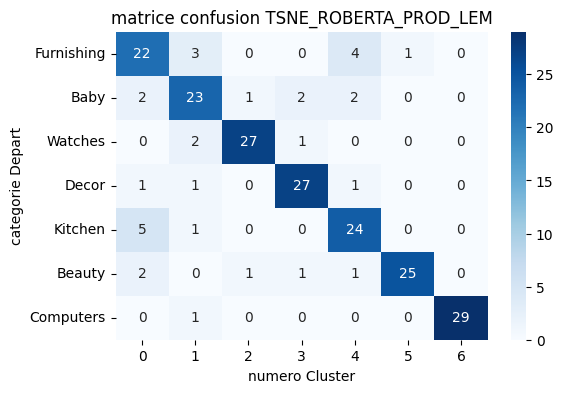

In [123]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.1.1.10  product_name** - racinisée</span>

In [124]:
# Variable dont on veut extraire les features
data_work['pname_stem'] = \
    data_work['pname_stem'].fillna('').astype(str)
data_prod_stem = data_work['pname_stem']

In [125]:
type_donnee = 'TSNE_ROBERTA_PROD_STEM'

# Instanciation du modèle
bert_prod_stem = SentenceTransformer('roberta-large-nli-mean-tokens')

# Encodage
vector_roberta_prod_stem = \
    bert_prod_stem.encode(data_prod_stem, show_progress_bar=False)

In [126]:
# Réduction de dimension tsne
tsne_roberta_prod_stem = TSNE(verbose=1, perplexity=50, n_iter=5000)
X_proj_tsne_roberta_prod_stem = \
    tsne_roberta_prod_stem.fit_transform(vector_roberta_prod_stem)
# Dataframe pour clustering
df_tsne_roberta_prod_stem = pd.DataFrame({'VAR1' : X_proj_tsne_roberta_prod_stem[:, 0],
                                           'VAR2' : X_proj_tsne_roberta_prod_stem[:, 1],
                                           'CATEGORIE' : data_work['category']})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.006s...
[t-SNE] Computed neighbors for 1050 samples in 0.140s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 9.270936
[t-SNE] KL divergence after 100 iterations with early exaggeration: 63.956734
[t-SNE] KL divergence after 5000 iterations: 0.936765


**Entrainement du modèle**

In [127]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_roberta_prod_stem[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [129]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.8607
Precision:
  - Macro: 0.8598
  - Micro: 0.8607
Recall:
  - Macro: 0.8607
  - Micro: 0.8607
F1-measure:
  - Macro: 0.8598
  - Micro: 0.8607


{'knn': {'micro_precision': 0.8607142857142858,
  'micro_recall': 0.8607142857142858,
  'micro_f1': 0.8607142857142858},
 'svm': {'micro_precision': 0.39166666666666666,
  'micro_recall': 0.39166666666666666,
  'micro_f1': 0.39166666666666666},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.675,
  'micro_recall': 0.675,
  'micro_f1': 0.675},
 'Gradient Boosting': {'micro_precision': 0.9642857142857143,
  'micro_recall': 0.9642857142857143,
  'micro_f1': 0.9642857142857143},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [130]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.4333
Precision:
  - Macro: 0.4593
  - Micro: 0.4333
Recall:
  - Macro: 0.4333
  - Micro: 0.4333
F1-measure:
  - Macro: 0.3443
  - Micro: 0.4333


{'knn': {'micro_precision': 0.8607142857142858,
  'micro_recall': 0.8607142857142858,
  'micro_f1': 0.8607142857142858},
 'svm': {'micro_precision': 0.43333333333333335,
  'micro_recall': 0.43333333333333335,
  'micro_f1': 0.43333333333333335},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.675,
  'micro_recall': 0.675,
  'micro_f1': 0.675},
 'Gradient Boosting': {'micro_precision': 0.9642857142857143,
  'micro_recall': 0.9642857142857143,
  'micro_f1': 0.9642857142857143},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [131]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 0.9988
Precision:
  - Macro: 0.9988
  - Micro: 0.9988
Recall:
  - Macro: 0.9988
  - Micro: 0.9988
F1-measure:
  - Macro: 0.9988
  - Micro: 0.9988


{'knn': {'micro_precision': 0.8607142857142858,
  'micro_recall': 0.8607142857142858,
  'micro_f1': 0.8607142857142858},
 'svm': {'micro_precision': 0.43333333333333335,
  'micro_recall': 0.43333333333333335,
  'micro_f1': 0.43333333333333335},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.675,
  'micro_recall': 0.675,
  'micro_f1': 0.675},
 'Gradient Boosting': {'micro_precision': 0.9642857142857143,
  'micro_recall': 0.9642857142857143,
  'micro_f1': 0.9642857142857143},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [132]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.5595
Precision:
  - Macro: 0.5258
  - Micro: 0.5595
Recall:
  - Macro: 0.5595
  - Micro: 0.5595
F1-measure:
  - Macro: 0.5217
  - Micro: 0.5595


{'knn': {'micro_precision': 0.8607142857142858,
  'micro_recall': 0.8607142857142858,
  'micro_f1': 0.8607142857142858},
 'svm': {'micro_precision': 0.43333333333333335,
  'micro_recall': 0.43333333333333335,
  'micro_f1': 0.43333333333333335},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5595238095238095,
  'micro_recall': 0.5595238095238095,
  'micro_f1': 0.5595238095238095},
 'Gradient Boosting': {'micro_precision': 0.9642857142857143,
  'micro_recall': 0.9642857142857143,
  'micro_f1': 0.9642857142857143},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [133]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9369
Precision:
  - Macro: 0.9408
  - Micro: 0.9369
Recall:
  - Macro: 0.9369
  - Micro: 0.9369
F1-measure:
  - Macro: 0.9368
  - Micro: 0.9369


{'knn': {'micro_precision': 0.8607142857142858,
  'micro_recall': 0.8607142857142858,
  'micro_f1': 0.8607142857142858},
 'svm': {'micro_precision': 0.43333333333333335,
  'micro_recall': 0.43333333333333335,
  'micro_f1': 0.43333333333333335},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5595238095238095,
  'micro_recall': 0.5595238095238095,
  'micro_f1': 0.5595238095238095},
 'Gradient Boosting': {'micro_precision': 0.9369047619047619,
  'micro_recall': 0.9369047619047619,
  'micro_f1': 0.9369047619047619},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [134]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 0.9988
Precision:
  - Macro: 0.9988
  - Micro: 0.9988
Recall:
  - Macro: 0.9988
  - Micro: 0.9988
F1-measure:
  - Macro: 0.9988
  - Micro: 0.9988


{'knn': {'micro_precision': 0.8607142857142858,
  'micro_recall': 0.8607142857142858,
  'micro_f1': 0.8607142857142858},
 'svm': {'micro_precision': 0.43333333333333335,
  'micro_recall': 0.43333333333333335,
  'micro_f1': 0.43333333333333335},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5595238095238095,
  'micro_recall': 0.5595238095238095,
  'micro_f1': 0.5595238095238095},
 'Gradient Boosting': {'micro_precision': 0.9369047619047619,
  'micro_recall': 0.9369047619047619,
  'micro_f1': 0.9369047619047619},
 'extra tree classifier': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238}}

In [135]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.860714,0.860714,0.860714
svm,0.433333,0.433333,0.433333
Random Forest,0.998810,0.998810,0.998810
Naive Bayes,0.559524,0.559524,0.559524
Gradient Boosting,0.936905,0.936905,0.936905
extra tree classifier,0.998810,0.998810,0.998810


In [136]:
etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.81


In [138]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)
#test_labels = le.inverse_transform(y_test)
labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_prod_stem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_prod_stem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_prod_stem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_prod_stem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[20  4  0  3  2  1  0]
 [ 1 20  0  2  5  2  0]
 [ 0  1 26  1  1  1  0]
 [ 1  1  1 25  2  0  0]
 [ 5  0  1  0 24  0  0]
 [ 3  0  1  0  1 25  0]
 [ 0  0  0  0  0  0 30]]
Correspondance des clusters :  [0 1 2 3 4 5 6]
Correspondance des clusters :  [0 1 2 3 4 5 6]

ACCURACY TSNE_ROBERTA_PROD_STEM (Test): 0.81
ACCURACY TSNE_ROBERTA_PROD_STEM (Train): 0.999


              precision    recall  f1-score   support

           0       0.67      0.67      0.67        30
           1       0.77      0.67      0.71        30
           2       0.90      0.87      0.88        30
           3       0.81      0.83      0.82        30
           4       0.69      0.80      0.74        30
           5       0.86      0.83      0.85        30
           6       1.00      1.00      1.00        30

    accuracy                           0.81       210
   macro avg       0.81      0.81      0.81       210
weighted avg       0.81      0.81      0.81       210



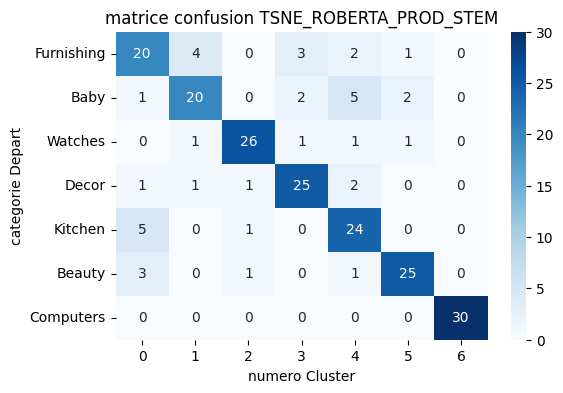

In [139]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.1.1.11   Mixte** - variables originales</span>

In [120]:
# Variable dont on veut extraire les features
data_work['var_orig'] = data_work['product_name'] + data_work['brand']
+ data_work['description'] + data_work['product_specifications']
data_work['var_orig'] = \
    data_work['var_orig'].fillna('').astype(str)
data_var_orig = data_work['var_orig']

In [121]:
type_donnee = 'TSNE_ROBERTA_VAR_ORIG'

# Instanciation du modèle
bert_var_orig = SentenceTransformer('roberta-large-nli-mean-tokens')

# Encodage
vector_roberta_var_orig = \
    bert_var_orig.encode(data_var_orig, show_progress_bar=False)

In [122]:
# Réduction de dimension tsne
tsne_roberta_var_orig = TSNE(verbose=1, perplexity=40, n_iter=5000)
X_proj_tsne_roberta_var_orig = \
    tsne_roberta_var_orig.fit_transform(vector_roberta_var_orig)
# Dataframe pour clustering
df_tsne_roberta_var_orig = pd.DataFrame({'VAR1' : X_proj_tsne_roberta_var_orig[:, 0],
                                           'VAR2' : X_proj_tsne_roberta_var_orig[:, 1],
                                           'CATEGORIE' : data_work['category']})

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.014s...
[t-SNE] Computed neighbors for 1050 samples in 1.162s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 9.082983
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.149902
[t-SNE] KL divergence after 5000 iterations: 0.913736


**Entrainement du modèle**

In [144]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_roberta_var_orig[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [145]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.8679
Precision:
  - Macro: 0.8684
  - Micro: 0.8679
Recall:
  - Macro: 0.8679
  - Micro: 0.8679
F1-measure:
  - Macro: 0.8674
  - Micro: 0.8679


{'knn': {'micro_precision': 0.8678571428571429,
  'micro_recall': 0.8678571428571429,
  'micro_f1': 0.8678571428571429},
 'svm': {'micro_precision': 0.43333333333333335,
  'micro_recall': 0.43333333333333335,
  'micro_f1': 0.43333333333333335},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5595238095238095,
  'micro_recall': 0.5595238095238095,
  'micro_f1': 0.5595238095238095},
 'Gradient Boosting': {'micro_precision': 0.9369047619047619,
  'micro_recall': 0.9369047619047619,
  'micro_f1': 0.9369047619047619},
 'extra tree classifier': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238}}

In [146]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.5000
Precision:
  - Macro: 0.4048
  - Micro: 0.5000
Recall:
  - Macro: 0.5000
  - Micro: 0.5000
F1-measure:
  - Macro: 0.4111
  - Micro: 0.5000


{'knn': {'micro_precision': 0.8678571428571429,
  'micro_recall': 0.8678571428571429,
  'micro_f1': 0.8678571428571429},
 'svm': {'micro_precision': 0.5, 'micro_recall': 0.5, 'micro_f1': 0.5},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5595238095238095,
  'micro_recall': 0.5595238095238095,
  'micro_f1': 0.5595238095238095},
 'Gradient Boosting': {'micro_precision': 0.9369047619047619,
  'micro_recall': 0.9369047619047619,
  'micro_f1': 0.9369047619047619},
 'extra tree classifier': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238}}

In [147]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8678571428571429,
  'micro_recall': 0.8678571428571429,
  'micro_f1': 0.8678571428571429},
 'svm': {'micro_precision': 0.5, 'micro_recall': 0.5, 'micro_f1': 0.5},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.5595238095238095,
  'micro_recall': 0.5595238095238095,
  'micro_f1': 0.5595238095238095},
 'Gradient Boosting': {'micro_precision': 0.9369047619047619,
  'micro_recall': 0.9369047619047619,
  'micro_f1': 0.9369047619047619},
 'extra tree classifier': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238}}

In [148]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.6583
Precision:
  - Macro: 0.6457
  - Micro: 0.6583
Recall:
  - Macro: 0.6583
  - Micro: 0.6583
F1-measure:
  - Macro: 0.6189
  - Micro: 0.6583


{'knn': {'micro_precision': 0.8678571428571429,
  'micro_recall': 0.8678571428571429,
  'micro_f1': 0.8678571428571429},
 'svm': {'micro_precision': 0.5, 'micro_recall': 0.5, 'micro_f1': 0.5},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6583333333333333,
  'micro_recall': 0.6583333333333333,
  'micro_f1': 0.6583333333333333},
 'Gradient Boosting': {'micro_precision': 0.9369047619047619,
  'micro_recall': 0.9369047619047619,
  'micro_f1': 0.9369047619047619},
 'extra tree classifier': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238}}

In [149]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9738
Precision:
  - Macro: 0.9743
  - Micro: 0.9738
Recall:
  - Macro: 0.9738
  - Micro: 0.9738
F1-measure:
  - Macro: 0.9737
  - Micro: 0.9738


{'knn': {'micro_precision': 0.8678571428571429,
  'micro_recall': 0.8678571428571429,
  'micro_f1': 0.8678571428571429},
 'svm': {'micro_precision': 0.5, 'micro_recall': 0.5, 'micro_f1': 0.5},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6583333333333333,
  'micro_recall': 0.6583333333333333,
  'micro_f1': 0.6583333333333333},
 'Gradient Boosting': {'micro_precision': 0.9738095238095238,
  'micro_recall': 0.9738095238095238,
  'micro_f1': 0.9738095238095238},
 'extra tree classifier': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238}}

In [150]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.8678571428571429,
  'micro_recall': 0.8678571428571429,
  'micro_f1': 0.8678571428571429},
 'svm': {'micro_precision': 0.5, 'micro_recall': 0.5, 'micro_f1': 0.5},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6583333333333333,
  'micro_recall': 0.6583333333333333,
  'micro_f1': 0.6583333333333333},
 'Gradient Boosting': {'micro_precision': 0.9738095238095238,
  'micro_recall': 0.9738095238095238,
  'micro_f1': 0.9738095238095238},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [151]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.867857,0.867857,0.867857
svm,0.500000,0.500000,0.500000
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.658333,0.658333,0.658333
Gradient Boosting,0.973810,0.973810,0.973810
extra tree classifier,1.000000,1.000000,1.000000


In [152]:
etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.819


In [154]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)
#test_labels = le.inverse_transform(y_test)
labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_var_orig_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_var_orig_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_orig_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_orig_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[22  0  0  1  6  1  0]
 [ 2 19  4  2  1  2  0]
 [ 0  0 29  0  0  0  1]
 [ 0  1  0 26  0  3  0]
 [ 6  0  0  0 24  0  0]
 [ 3  1  2  2  0 22  0]
 [ 0  0  0  0  0  0 30]]
Correspondance des clusters :  [0 1 2 3 4 5 6]
Correspondance des clusters :  [0 1 2 3 4 5 6]

ACCURACY TSNE_ROBERTA_VAR_ORIG (Test): 0.819
ACCURACY TSNE_ROBERTA_VAR_ORIG (Train): 1.0


              precision    recall  f1-score   support

           0       0.67      0.73      0.70        30
           1       0.90      0.63      0.75        30
           2       0.83      0.97      0.89        30
           3       0.84      0.87      0.85        30
           4       0.77      0.80      0.79        30
           5       0.79      0.73      0.76        30
           6       0.97      1.00      0.98        30

    accuracy                           0.82       210
   macro avg       0.82      0.82      0.82       210
weighted avg       0.82      0.82      0.82       210



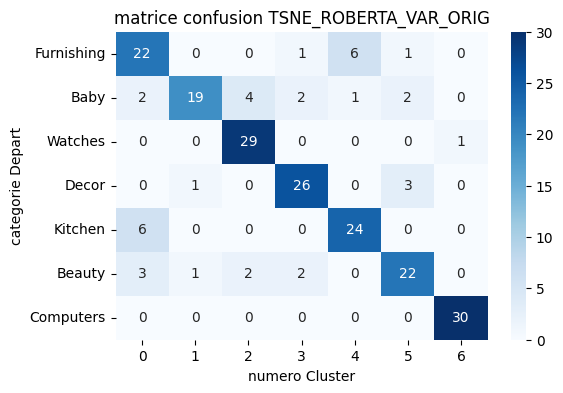

In [155]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.1.1.12  Mixte** - stemmatisée</span>

In [157]:
# Variable dont on veut extraire les features
data_work['var_stem'] = data_work['pname_stem'] + data_work['brand_stem']
+ data_work['desc_stem'] + data_work['prod_spec_stem']
data_work['var_stem'] = \
    data_work['var_stem'].fillna('').astype(str)
data_var_stem = data_work['var_stem']

In [158]:
type_donnee = 'TSNE_ROBERTA_VAR_STEM'

# Instanciation du modèle
bert_var_stem = SentenceTransformer('roberta-large-nli-mean-tokens')

# Encodage
vector_roberta_var_stem = \
    bert_var_stem.encode(data_var_stem, show_progress_bar=False)

In [160]:
# Réduction de dimension tsne
tsne_roberta_var_stem = TSNE(verbose=1, perplexity=50, n_iter=5000)
X_proj_tsne_roberta_var_stem = \
    tsne_roberta_var_stem.fit_transform(vector_roberta_var_stem)
# Dataframe pour clustering
df_tsne_roberta_var_stem = pd.DataFrame({'VAR1' : X_proj_tsne_roberta_var_stem[:, 0],
                                           'VAR2' : X_proj_tsne_roberta_var_stem[:, 1],
                                           'CATEGORIE' : data_work['category']})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.000s...
[t-SNE] Computed neighbors for 1050 samples in 0.151s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 8.559208
[t-SNE] KL divergence after 50 iterations with early exaggeration: 63.461143
[t-SNE] KL divergence after 3650 iterations: 0.968158


**Entrainement du modèle**

In [161]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_roberta_var_stem[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [162]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.8119
Precision:
  - Macro: 0.8129
  - Micro: 0.8119
Recall:
  - Macro: 0.8119
  - Micro: 0.8119
F1-measure:
  - Macro: 0.8112
  - Micro: 0.8119


{'knn': {'micro_precision': 0.8119047619047619,
  'micro_recall': 0.8119047619047619,
  'micro_f1': 0.8119047619047619},
 'svm': {'micro_precision': 0.5, 'micro_recall': 0.5, 'micro_f1': 0.5},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6583333333333333,
  'micro_recall': 0.6583333333333333,
  'micro_f1': 0.6583333333333333},
 'Gradient Boosting': {'micro_precision': 0.9738095238095238,
  'micro_recall': 0.9738095238095238,
  'micro_f1': 0.9738095238095238},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [163]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.3429
Precision:
  - Macro: 0.3569
  - Micro: 0.3429
Recall:
  - Macro: 0.3429
  - Micro: 0.3429
F1-measure:
  - Macro: 0.3172
  - Micro: 0.3429


{'knn': {'micro_precision': 0.8119047619047619,
  'micro_recall': 0.8119047619047619,
  'micro_f1': 0.8119047619047619},
 'svm': {'micro_precision': 0.34285714285714286,
  'micro_recall': 0.34285714285714286,
  'micro_f1': 0.34285714285714286},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6583333333333333,
  'micro_recall': 0.6583333333333333,
  'micro_f1': 0.6583333333333333},
 'Gradient Boosting': {'micro_precision': 0.9738095238095238,
  'micro_recall': 0.9738095238095238,
  'micro_f1': 0.9738095238095238},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [164]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 0.9988
Precision:
  - Macro: 0.9988
  - Micro: 0.9988
Recall:
  - Macro: 0.9988
  - Micro: 0.9988
F1-measure:
  - Macro: 0.9988
  - Micro: 0.9988


{'knn': {'micro_precision': 0.8119047619047619,
  'micro_recall': 0.8119047619047619,
  'micro_f1': 0.8119047619047619},
 'svm': {'micro_precision': 0.34285714285714286,
  'micro_recall': 0.34285714285714286,
  'micro_f1': 0.34285714285714286},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.6583333333333333,
  'micro_recall': 0.6583333333333333,
  'micro_f1': 0.6583333333333333},
 'Gradient Boosting': {'micro_precision': 0.9738095238095238,
  'micro_recall': 0.9738095238095238,
  'micro_f1': 0.9738095238095238},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [165]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.5619
Precision:
  - Macro: 0.5568
  - Micro: 0.5619
Recall:
  - Macro: 0.5619
  - Micro: 0.5619
F1-measure:
  - Macro: 0.5413
  - Micro: 0.5619


{'knn': {'micro_precision': 0.8119047619047619,
  'micro_recall': 0.8119047619047619,
  'micro_f1': 0.8119047619047619},
 'svm': {'micro_precision': 0.34285714285714286,
  'micro_recall': 0.34285714285714286,
  'micro_f1': 0.34285714285714286},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5619047619047619,
  'micro_recall': 0.5619047619047619,
  'micro_f1': 0.5619047619047619},
 'Gradient Boosting': {'micro_precision': 0.9738095238095238,
  'micro_recall': 0.9738095238095238,
  'micro_f1': 0.9738095238095238},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [166]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9310
Precision:
  - Macro: 0.9330
  - Micro: 0.9310
Recall:
  - Macro: 0.9310
  - Micro: 0.9310
F1-measure:
  - Macro: 0.9308
  - Micro: 0.9310


{'knn': {'micro_precision': 0.8119047619047619,
  'micro_recall': 0.8119047619047619,
  'micro_f1': 0.8119047619047619},
 'svm': {'micro_precision': 0.34285714285714286,
  'micro_recall': 0.34285714285714286,
  'micro_f1': 0.34285714285714286},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5619047619047619,
  'micro_recall': 0.5619047619047619,
  'micro_f1': 0.5619047619047619},
 'Gradient Boosting': {'micro_precision': 0.930952380952381,
  'micro_recall': 0.930952380952381,
  'micro_f1': 0.930952380952381},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [167]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 0.9988
Precision:
  - Macro: 0.9988
  - Micro: 0.9988
Recall:
  - Macro: 0.9988
  - Micro: 0.9988
F1-measure:
  - Macro: 0.9988
  - Micro: 0.9988


{'knn': {'micro_precision': 0.8119047619047619,
  'micro_recall': 0.8119047619047619,
  'micro_f1': 0.8119047619047619},
 'svm': {'micro_precision': 0.34285714285714286,
  'micro_recall': 0.34285714285714286,
  'micro_f1': 0.34285714285714286},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5619047619047619,
  'micro_recall': 0.5619047619047619,
  'micro_f1': 0.5619047619047619},
 'Gradient Boosting': {'micro_precision': 0.930952380952381,
  'micro_recall': 0.930952380952381,
  'micro_f1': 0.930952380952381},
 'extra tree classifier': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238}}

In [168]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.811905,0.811905,0.811905
svm,0.342857,0.342857,0.342857
Random Forest,0.998810,0.998810,0.998810
Naive Bayes,0.561905,0.561905,0.561905
Gradient Boosting,0.930952,0.930952,0.930952
extra tree classifier,0.998810,0.998810,0.998810


In [169]:
etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.748


In [172]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)
#test_labels = le.inverse_transform(y_test)
labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_var_stem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_var_stem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_stem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_stem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[22  0  0  2  5  1  0]
 [ 1 21  0  0  2  5  1]
 [ 0  2 26  1  0  1  0]
 [ 3  2  0 22  2  1  0]
 [ 8  0  0  2 19  1  0]
 [ 5  0  3  2  1 19  0]
 [ 0  0  1  0  1  0 28]]
Correspondance des clusters :  [0 1 2 3 4 5 6]
Correspondance des clusters :  [0 1 2 3 4 5 6]

ACCURACY TSNE_ROBERTA_VAR_STEM (Test): 0.748
ACCURACY TSNE_ROBERTA_VAR_STEM (Train): 0.999


              precision    recall  f1-score   support

           0       0.56      0.73      0.64        30
           1       0.84      0.70      0.76        30
           2       0.87      0.87      0.87        30
           3       0.76      0.73      0.75        30
           4       0.63      0.63      0.63        30
           5       0.68      0.63      0.66        30
           6       0.97      0.93      0.95        30

    accuracy                           0.75       210
   macro avg       0.76      0.75      0.75       210
weighted avg       0.76      0.75      0.75       210



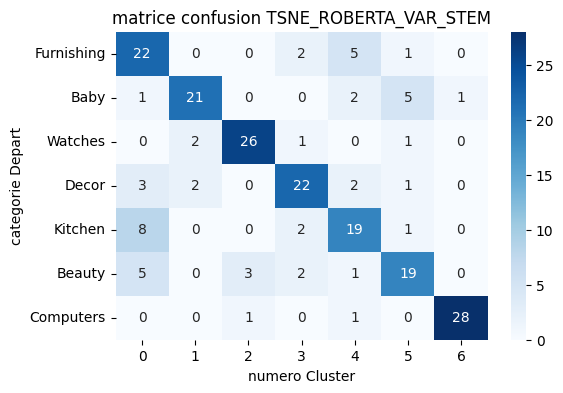

In [173]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.1.1.12  Mixte** - nom du produit et produit spécification stemmatisés</span> 

In [67]:
# Variable dont on veut extraire les features
data_work['var_prod_stem'] = data_work['pname_stem']
+ data_work['prod_spec_stem']
data_work['var_prod_stem'] = \
    data_work['var_prod_stem'].fillna('').astype(str)
data_var_prod_stem = data_work['var_prod_stem']

In [175]:
type_donnee = 'TSNE_ROBERTA_VAR_PROD_STEM'

# Instanciation du modèle
bert_var_prod_stem = SentenceTransformer('roberta-large-nli-mean-tokens')

# Encodage
vector_roberta_var_prod_stem = \
    bert_var_prod_stem.encode(data_var_prod_stem, show_progress_bar=False)

In [176]:
# Réduction de dimension tsne
tsne_roberta_var_prod_stem = TSNE(verbose=1, perplexity=50, n_iter=5000)
X_proj_tsne_roberta_var_prod_stem = \
    tsne_roberta_var_prod_stem.fit_transform(vector_roberta_var_prod_stem)
# Dataframe pour clustering
df_tsne_roberta_var_prod_stem = pd.DataFrame({'VAR1' : X_proj_tsne_roberta_var_prod_stem[:, 0],
                                           'VAR2' : X_proj_tsne_roberta_var_prod_stem[:, 1],
                                           'CATEGORIE' : data_work['category']})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.026s...
[t-SNE] Computed neighbors for 1050 samples in 0.211s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 9.270936
[t-SNE] KL divergence after 100 iterations with early exaggeration: 63.956825
[t-SNE] KL divergence after 5000 iterations: 0.896341


**Entraienement du modèle**

In [177]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_roberta_var_prod_stem[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [178]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.8464
Precision:
  - Macro: 0.8468
  - Micro: 0.8464
Recall:
  - Macro: 0.8464
  - Micro: 0.8464
F1-measure:
  - Macro: 0.8458
  - Micro: 0.8464


{'knn': {'micro_precision': 0.8464285714285714,
  'micro_recall': 0.8464285714285714,
  'micro_f1': 0.8464285714285714},
 'svm': {'micro_precision': 0.34285714285714286,
  'micro_recall': 0.34285714285714286,
  'micro_f1': 0.34285714285714286},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5619047619047619,
  'micro_recall': 0.5619047619047619,
  'micro_f1': 0.5619047619047619},
 'Gradient Boosting': {'micro_precision': 0.930952380952381,
  'micro_recall': 0.930952380952381,
  'micro_f1': 0.930952380952381},
 'extra tree classifier': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238}}

In [179]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.4679
Precision:
  - Macro: 0.3861
  - Micro: 0.4679
Recall:
  - Macro: 0.4679
  - Micro: 0.4679
F1-measure:
  - Macro: 0.3997
  - Micro: 0.4679


{'knn': {'micro_precision': 0.8464285714285714,
  'micro_recall': 0.8464285714285714,
  'micro_f1': 0.8464285714285714},
 'svm': {'micro_precision': 0.46785714285714286,
  'micro_recall': 0.46785714285714286,
  'micro_f1': 0.46785714285714286},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5619047619047619,
  'micro_recall': 0.5619047619047619,
  'micro_f1': 0.5619047619047619},
 'Gradient Boosting': {'micro_precision': 0.930952380952381,
  'micro_recall': 0.930952380952381,
  'micro_f1': 0.930952380952381},
 'extra tree classifier': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238}}

In [180]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 0.9988
Precision:
  - Macro: 0.9988
  - Micro: 0.9988
Recall:
  - Macro: 0.9988
  - Micro: 0.9988
F1-measure:
  - Macro: 0.9988
  - Micro: 0.9988


{'knn': {'micro_precision': 0.8464285714285714,
  'micro_recall': 0.8464285714285714,
  'micro_f1': 0.8464285714285714},
 'svm': {'micro_precision': 0.46785714285714286,
  'micro_recall': 0.46785714285714286,
  'micro_f1': 0.46785714285714286},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5619047619047619,
  'micro_recall': 0.5619047619047619,
  'micro_f1': 0.5619047619047619},
 'Gradient Boosting': {'micro_precision': 0.930952380952381,
  'micro_recall': 0.930952380952381,
  'micro_f1': 0.930952380952381},
 'extra tree classifier': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238}}

In [181]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.5905
Precision:
  - Macro: 0.5834
  - Micro: 0.5905
Recall:
  - Macro: 0.5905
  - Micro: 0.5905
F1-measure:
  - Macro: 0.5755
  - Micro: 0.5905


{'knn': {'micro_precision': 0.8464285714285714,
  'micro_recall': 0.8464285714285714,
  'micro_f1': 0.8464285714285714},
 'svm': {'micro_precision': 0.46785714285714286,
  'micro_recall': 0.46785714285714286,
  'micro_f1': 0.46785714285714286},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5904761904761905,
  'micro_recall': 0.5904761904761905,
  'micro_f1': 0.5904761904761905},
 'Gradient Boosting': {'micro_precision': 0.930952380952381,
  'micro_recall': 0.930952380952381,
  'micro_f1': 0.930952380952381},
 'extra tree classifier': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238}}

In [182]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9345
Precision:
  - Macro: 0.9399
  - Micro: 0.9345
Recall:
  - Macro: 0.9345
  - Micro: 0.9345
F1-measure:
  - Macro: 0.9352
  - Micro: 0.9345


{'knn': {'micro_precision': 0.8464285714285714,
  'micro_recall': 0.8464285714285714,
  'micro_f1': 0.8464285714285714},
 'svm': {'micro_precision': 0.46785714285714286,
  'micro_recall': 0.46785714285714286,
  'micro_f1': 0.46785714285714286},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5904761904761905,
  'micro_recall': 0.5904761904761905,
  'micro_f1': 0.5904761904761905},
 'Gradient Boosting': {'micro_precision': 0.9345238095238095,
  'micro_recall': 0.9345238095238095,
  'micro_f1': 0.9345238095238095},
 'extra tree classifier': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238}}

In [183]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 0.9988
Precision:
  - Macro: 0.9988
  - Micro: 0.9988
Recall:
  - Macro: 0.9988
  - Micro: 0.9988
F1-measure:
  - Macro: 0.9988
  - Micro: 0.9988


{'knn': {'micro_precision': 0.8464285714285714,
  'micro_recall': 0.8464285714285714,
  'micro_f1': 0.8464285714285714},
 'svm': {'micro_precision': 0.46785714285714286,
  'micro_recall': 0.46785714285714286,
  'micro_f1': 0.46785714285714286},
 'Random Forest': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'Naive Bayes': {'micro_precision': 0.5904761904761905,
  'micro_recall': 0.5904761904761905,
  'micro_f1': 0.5904761904761905},
 'Gradient Boosting': {'micro_precision': 0.9345238095238095,
  'micro_recall': 0.9345238095238095,
  'micro_f1': 0.9345238095238095},
 'extra tree classifier': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238}}

**Synthèse des résultats**

In [184]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.846429,0.846429,0.846429
svm,0.467857,0.467857,0.467857
Random Forest,0.998810,0.998810,0.998810
Naive Bayes,0.590476,0.590476,0.590476
Gradient Boosting,0.934524,0.934524,0.934524
extra tree classifier,0.998810,0.998810,0.998810


In [185]:
etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.829


In [186]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)

labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_var_prod_stem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_var_prod_stem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[20  3  1  0  3  3  0]
 [ 1 21  0  1  5  2  0]
 [ 0  2 27  0  0  1  0]
 [ 0  2  0 25  3  0  0]
 [ 3  1  0  1 25  0  0]
 [ 2  0  1  0  1 26  0]
 [ 0  0  0  0  0  0 30]]
Correspondance des clusters :  [0 1 2 3 4 5 6]
Correspondance des clusters :  [0 1 2 3 4 5 6]

ACCURACY TSNE_ROBERTA_VAR_PROD_STEM (Test): 0.829
ACCURACY TSNE_ROBERTA_VAR_PROD_STEM (Train): 0.999


              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.72      0.70      0.71        30
           2       0.93      0.90      0.92        30
           3       0.93      0.83      0.88        30
           4       0.68      0.83      0.75        30
           5       0.81      0.87      0.84        30
           6       1.00      1.00      1.00        30

    accuracy                           0.83       210
   macro avg       0.83      0.83      0.83       210
weighted avg       0.83      0.83      0.83       210



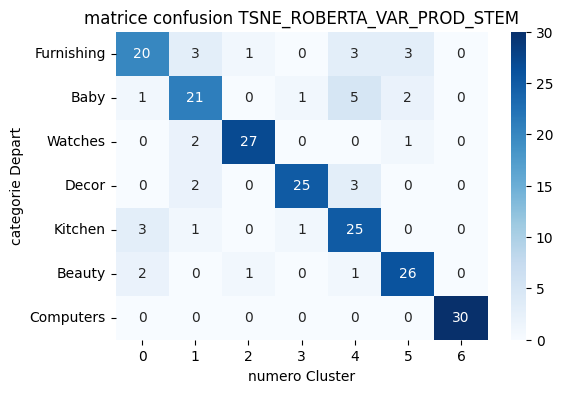

In [187]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

#### <span style='background:wheat'>3.1.2 CountVectorizer</span>

<span style='background:orange'>**3.1.2.1. produit_specifications** - lemmatisée </span>

**Sans réduction ACP**

In [307]:
# Variable dont on veut extraire les features
data_work['prod_spec_lem'] = \
    data_work['prod_spec_lem'].fillna('').astype(str)
data_prods_lem = data_work['prod_spec_lem']

In [331]:
type_donnee = 'TSNE_CV_PRODS_LEM'

In [320]:
df_prods_lem_cv = vectorize_text_data(data_prods_lem, CountVectorizer())
df_prods_lem_cv_tsne = tsne(df_prods_lem_cv, 40)

(1050, 2638)


In [321]:
# Dataframe pour clustering
df_prods_lem_cv_tsne = pd.DataFrame({'VAR1' : df_prods_lem_cv_tsne['DIM1'],
                                           'VAR2' : df_prods_lem_cv_tsne['DIM2'],
                                           'CATEGORIE' : data_work['category']})

**Entraienement du modèle**

In [316]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_prods_lem_cv_tsne[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [319]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.9131
Precision:
  - Macro: 0.9139
  - Micro: 0.9131
Recall:
  - Macro: 0.9131
  - Micro: 0.9131
F1-measure:
  - Macro: 0.9131
  - Micro: 0.9131


{'knn': {'micro_precision': 0.9130952380952381,
  'micro_recall': 0.9130952380952381,
  'micro_f1': 0.913095238095238}}

In [322]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.4583
Precision:
  - Macro: 0.3007
  - Micro: 0.4583
Recall:
  - Macro: 0.4583
  - Micro: 0.4583
F1-measure:
  - Macro: 0.3488
  - Micro: 0.4583


{'knn': {'micro_precision': 0.9130952380952381,
  'micro_recall': 0.9130952380952381,
  'micro_f1': 0.913095238095238},
 'svm': {'micro_precision': 0.4583333333333333,
  'micro_recall': 0.4583333333333333,
  'micro_f1': 0.4583333333333333}}

In [323]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9130952380952381,
  'micro_recall': 0.9130952380952381,
  'micro_f1': 0.913095238095238},
 'svm': {'micro_precision': 0.4583333333333333,
  'micro_recall': 0.4583333333333333,
  'micro_f1': 0.4583333333333333},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [324]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.6405
Precision:
  - Macro: 0.6716
  - Micro: 0.6405
Recall:
  - Macro: 0.6405
  - Micro: 0.6405
F1-measure:
  - Macro: 0.6275
  - Micro: 0.6405


{'knn': {'micro_precision': 0.9130952380952381,
  'micro_recall': 0.9130952380952381,
  'micro_f1': 0.913095238095238},
 'svm': {'micro_precision': 0.4583333333333333,
  'micro_recall': 0.4583333333333333,
  'micro_f1': 0.4583333333333333},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6404761904761904,
  'micro_recall': 0.6404761904761904,
  'micro_f1': 0.6404761904761904}}

In [325]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9869
Precision:
  - Macro: 0.9871
  - Micro: 0.9869
Recall:
  - Macro: 0.9869
  - Micro: 0.9869
F1-measure:
  - Macro: 0.9868
  - Micro: 0.9869


{'knn': {'micro_precision': 0.9130952380952381,
  'micro_recall': 0.9130952380952381,
  'micro_f1': 0.913095238095238},
 'svm': {'micro_precision': 0.4583333333333333,
  'micro_recall': 0.4583333333333333,
  'micro_f1': 0.4583333333333333},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6404761904761904,
  'micro_recall': 0.6404761904761904,
  'micro_f1': 0.6404761904761904},
 'Gradient Boosting': {'micro_precision': 0.986904761904762,
  'micro_recall': 0.986904761904762,
  'micro_f1': 0.986904761904762}}

In [326]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9130952380952381,
  'micro_recall': 0.9130952380952381,
  'micro_f1': 0.913095238095238},
 'svm': {'micro_precision': 0.4583333333333333,
  'micro_recall': 0.4583333333333333,
  'micro_f1': 0.4583333333333333},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6404761904761904,
  'micro_recall': 0.6404761904761904,
  'micro_f1': 0.6404761904761904},
 'Gradient Boosting': {'micro_precision': 0.986904761904762,
  'micro_recall': 0.986904761904762,
  'micro_f1': 0.986904761904762},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [327]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.913095,0.913095,0.913095
svm,0.458333,0.458333,0.458333
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.640476,0.640476,0.640476
Gradient Boosting,0.986905,0.986905,0.986905
extra tree classifier,1.000000,1.000000,1.000000


In [328]:
etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.867


In [332]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)

labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_var_prod_stem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_var_prod_stem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[20  2  2  2  4  0  0]
 [ 1 25  3  0  0  1  0]
 [ 0  0 27  0  0  3  0]
 [ 0  0  0 27  0  3  0]
 [ 5  0  0  0 25  0  0]
 [ 0  1  0  1  0 28  0]
 [ 0  0  0  0  0  0 30]]

ACCURACY TSNE_CV_PRODS_LEM (Test): 0.867
ACCURACY TSNE_CV_PRODS_LEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.89      0.83      0.86        30
           2       0.84      0.90      0.87        30
           3       0.90      0.90      0.90        30
           4       0.86      0.83      0.85        30
           5       0.80      0.93      0.86        30
           6       1.00      1.00      1.00        30

    accuracy                           0.87       210
   macro avg       0.87      0.87      0.87       210
weighted avg       0.87      0.87      0.87       210



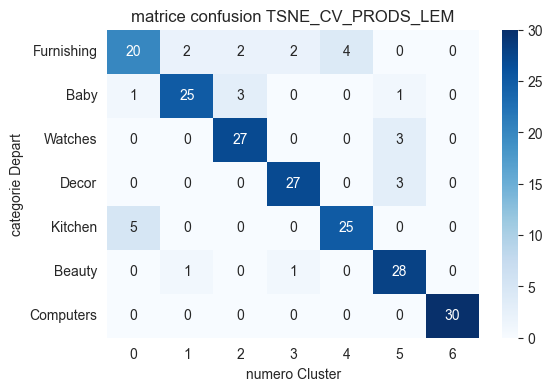

In [335]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

**Avec réduction ACP**

In [367]:
type_donnee = 'TSNE_ACP_CV_PRODS_LEM'

df_data_prods_lem_cv = vectorize_text_data(data_prods_lem, CountVectorizer())
df_data_prods_lem_cv_acp = acp(df_data_prods_lem_cv)
df_data_prods_lem_cv_acp_tsne = tsne(df_data_prods_lem_cv_acp, 40)

(1050, 2638)
Nombre de features après réduction ACP pour 99.0% de variance : 393


In [355]:
# Dataframe pour clustering
df_data_prods_lem_cv_acp_tsne = pd.DataFrame({'VAR1' : df_data_prods_lem_cv_acp_tsne['DIM1'],
                                           'VAR2' : df_data_prods_lem_cv_acp_tsne['DIM2'],
                                           'CATEGORIE' : data_work['category']})

**Entrainement du modèle**

In [356]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_data_prods_lem_cv_acp_tsne[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [357]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.9179
Precision:
  - Macro: 0.9186
  - Micro: 0.9179
Recall:
  - Macro: 0.9179
  - Micro: 0.9179
F1-measure:
  - Macro: 0.9177
  - Micro: 0.9179


{'knn': {'micro_precision': 0.9178571428571428,
  'micro_recall': 0.9178571428571428,
  'micro_f1': 0.9178571428571429},
 'svm': {'micro_precision': 0.5166666666666667,
  'micro_recall': 0.5166666666666667,
  'micro_f1': 0.5166666666666667},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6416666666666667,
  'micro_recall': 0.6416666666666667,
  'micro_f1': 0.6416666666666667},
 'Gradient Boosting': {'micro_precision': 0.9821428571428571,
  'micro_recall': 0.9821428571428571,
  'micro_f1': 0.9821428571428571},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [358]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.4119
Precision:
  - Macro: 0.2865
  - Micro: 0.4119
Recall:
  - Macro: 0.4119
  - Micro: 0.4119
F1-measure:
  - Macro: 0.3079
  - Micro: 0.4119


{'knn': {'micro_precision': 0.9178571428571428,
  'micro_recall': 0.9178571428571428,
  'micro_f1': 0.9178571428571429},
 'svm': {'micro_precision': 0.4119047619047619,
  'micro_recall': 0.4119047619047619,
  'micro_f1': 0.4119047619047619},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6416666666666667,
  'micro_recall': 0.6416666666666667,
  'micro_f1': 0.6416666666666667},
 'Gradient Boosting': {'micro_precision': 0.9821428571428571,
  'micro_recall': 0.9821428571428571,
  'micro_f1': 0.9821428571428571},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [359]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9178571428571428,
  'micro_recall': 0.9178571428571428,
  'micro_f1': 0.9178571428571429},
 'svm': {'micro_precision': 0.4119047619047619,
  'micro_recall': 0.4119047619047619,
  'micro_f1': 0.4119047619047619},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6416666666666667,
  'micro_recall': 0.6416666666666667,
  'micro_f1': 0.6416666666666667},
 'Gradient Boosting': {'micro_precision': 0.9821428571428571,
  'micro_recall': 0.9821428571428571,
  'micro_f1': 0.9821428571428571},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [360]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.6143
Precision:
  - Macro: 0.6427
  - Micro: 0.6143
Recall:
  - Macro: 0.6143
  - Micro: 0.6143
F1-measure:
  - Macro: 0.5984
  - Micro: 0.6143


{'knn': {'micro_precision': 0.9178571428571428,
  'micro_recall': 0.9178571428571428,
  'micro_f1': 0.9178571428571429},
 'svm': {'micro_precision': 0.4119047619047619,
  'micro_recall': 0.4119047619047619,
  'micro_f1': 0.4119047619047619},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6142857142857143,
  'micro_recall': 0.6142857142857143,
  'micro_f1': 0.6142857142857143},
 'Gradient Boosting': {'micro_precision': 0.9821428571428571,
  'micro_recall': 0.9821428571428571,
  'micro_f1': 0.9821428571428571},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [361]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9905
Precision:
  - Macro: 0.9906
  - Micro: 0.9905
Recall:
  - Macro: 0.9905
  - Micro: 0.9905
F1-measure:
  - Macro: 0.9905
  - Micro: 0.9905


{'knn': {'micro_precision': 0.9178571428571428,
  'micro_recall': 0.9178571428571428,
  'micro_f1': 0.9178571428571429},
 'svm': {'micro_precision': 0.4119047619047619,
  'micro_recall': 0.4119047619047619,
  'micro_f1': 0.4119047619047619},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6142857142857143,
  'micro_recall': 0.6142857142857143,
  'micro_f1': 0.6142857142857143},
 'Gradient Boosting': {'micro_precision': 0.9904761904761905,
  'micro_recall': 0.9904761904761905,
  'micro_f1': 0.9904761904761905},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [362]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9178571428571428,
  'micro_recall': 0.9178571428571428,
  'micro_f1': 0.9178571428571429},
 'svm': {'micro_precision': 0.4119047619047619,
  'micro_recall': 0.4119047619047619,
  'micro_f1': 0.4119047619047619},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6142857142857143,
  'micro_recall': 0.6142857142857143,
  'micro_f1': 0.6142857142857143},
 'Gradient Boosting': {'micro_precision': 0.9904761904761905,
  'micro_recall': 0.9904761904761905,
  'micro_f1': 0.9904761904761905},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [363]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.917857,0.917857,0.917857
svm,0.411905,0.411905,0.411905
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.614286,0.614286,0.614286
Gradient Boosting,0.990476,0.990476,0.990476
extra tree classifier,1.000000,1.000000,1.000000


In [364]:
etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.871


In [365]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)

labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_var_prod_stem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_var_prod_stem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[22  1  1  3  3  0  0]
 [ 2 25  3  0  0  0  0]
 [ 0  0 27  1  1  1  0]
 [ 0  0  1 26  0  3  0]
 [ 4  0  0  2 24  0  0]
 [ 0  1  0  0  0 29  0]
 [ 0  0  0  0  0  0 30]]

ACCURACY TSNE_CV_PRODS_STEM (Test): 0.871
ACCURACY TSNE_CV_PRODS_STEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.93      0.83      0.88        30
           2       0.84      0.90      0.87        30
           3       0.81      0.87      0.84        30
           4       0.86      0.80      0.83        30
           5       0.88      0.97      0.92        30
           6       1.00      1.00      1.00        30

    accuracy                           0.87       210
   macro avg       0.87      0.87      0.87       210
weighted avg       0.87      0.87      0.87       210



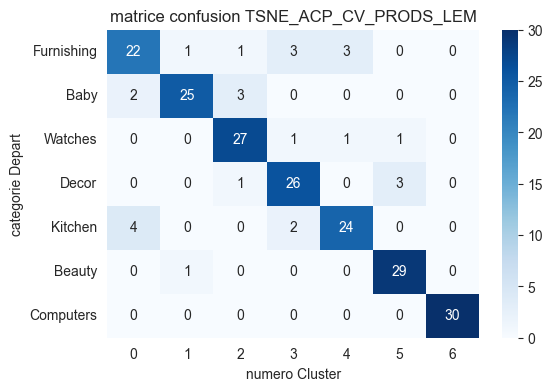

In [372]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.2.2. produit_specifications** - racinisée </span>

**Sans réduction ACP**

In [336]:
# Variable dont on veut extraire les features
data_work['prod_spec_stem'] = \
    data_work['prod_spec_stem'].fillna('').astype(str)
data_prods_stem = data_work['prod_spec_stem']

In [337]:
type_donnee = 'TSNE_CV_PRODS_STEM'

df_prods_stem_cv = vectorize_text_data(data_prods_stem, CountVectorizer())
df_prods_stem_cv_tsne = tsne(df_prods_stem_cv, 40)

(1050, 2544)


In [338]:
# Dataframe pour clustering
df_prods_stem_cv_tsne = pd.DataFrame({'VAR1' : df_prods_stem_cv_tsne['DIM1'],
                                           'VAR2' : df_prods_stem_cv_tsne['DIM2'],
                                           'CATEGORIE' : data_work['category']})

**Entrainement du modèle**

In [340]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_prods_stem_cv_tsne[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [341]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.9107
Precision:
  - Macro: 0.9111
  - Micro: 0.9107
Recall:
  - Macro: 0.9107
  - Micro: 0.9107
F1-measure:
  - Macro: 0.9106
  - Micro: 0.9107


{'knn': {'micro_precision': 0.9107142857142857,
  'micro_recall': 0.9107142857142857,
  'micro_f1': 0.9107142857142857},
 'svm': {'micro_precision': 0.4583333333333333,
  'micro_recall': 0.4583333333333333,
  'micro_f1': 0.4583333333333333},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6404761904761904,
  'micro_recall': 0.6404761904761904,
  'micro_f1': 0.6404761904761904},
 'Gradient Boosting': {'micro_precision': 0.986904761904762,
  'micro_recall': 0.986904761904762,
  'micro_f1': 0.986904761904762},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [342]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.5167
Precision:
  - Macro: 0.4787
  - Micro: 0.5167
Recall:
  - Macro: 0.5167
  - Micro: 0.5167
F1-measure:
  - Macro: 0.4605
  - Micro: 0.5167


{'knn': {'micro_precision': 0.9107142857142857,
  'micro_recall': 0.9107142857142857,
  'micro_f1': 0.9107142857142857},
 'svm': {'micro_precision': 0.5166666666666667,
  'micro_recall': 0.5166666666666667,
  'micro_f1': 0.5166666666666667},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6404761904761904,
  'micro_recall': 0.6404761904761904,
  'micro_f1': 0.6404761904761904},
 'Gradient Boosting': {'micro_precision': 0.986904761904762,
  'micro_recall': 0.986904761904762,
  'micro_f1': 0.986904761904762},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [343]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9107142857142857,
  'micro_recall': 0.9107142857142857,
  'micro_f1': 0.9107142857142857},
 'svm': {'micro_precision': 0.5166666666666667,
  'micro_recall': 0.5166666666666667,
  'micro_f1': 0.5166666666666667},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6404761904761904,
  'micro_recall': 0.6404761904761904,
  'micro_f1': 0.6404761904761904},
 'Gradient Boosting': {'micro_precision': 0.986904761904762,
  'micro_recall': 0.986904761904762,
  'micro_f1': 0.986904761904762},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [344]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.6417
Precision:
  - Macro: 0.6740
  - Micro: 0.6417
Recall:
  - Macro: 0.6417
  - Micro: 0.6417
F1-measure:
  - Macro: 0.6304
  - Micro: 0.6417


{'knn': {'micro_precision': 0.9107142857142857,
  'micro_recall': 0.9107142857142857,
  'micro_f1': 0.9107142857142857},
 'svm': {'micro_precision': 0.5166666666666667,
  'micro_recall': 0.5166666666666667,
  'micro_f1': 0.5166666666666667},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6416666666666667,
  'micro_recall': 0.6416666666666667,
  'micro_f1': 0.6416666666666667},
 'Gradient Boosting': {'micro_precision': 0.986904761904762,
  'micro_recall': 0.986904761904762,
  'micro_f1': 0.986904761904762},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [345]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9821
Precision:
  - Macro: 0.9824
  - Micro: 0.9821
Recall:
  - Macro: 0.9821
  - Micro: 0.9821
F1-measure:
  - Macro: 0.9822
  - Micro: 0.9821


{'knn': {'micro_precision': 0.9107142857142857,
  'micro_recall': 0.9107142857142857,
  'micro_f1': 0.9107142857142857},
 'svm': {'micro_precision': 0.5166666666666667,
  'micro_recall': 0.5166666666666667,
  'micro_f1': 0.5166666666666667},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6416666666666667,
  'micro_recall': 0.6416666666666667,
  'micro_f1': 0.6416666666666667},
 'Gradient Boosting': {'micro_precision': 0.9821428571428571,
  'micro_recall': 0.9821428571428571,
  'micro_f1': 0.9821428571428571},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [346]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9107142857142857,
  'micro_recall': 0.9107142857142857,
  'micro_f1': 0.9107142857142857},
 'svm': {'micro_precision': 0.5166666666666667,
  'micro_recall': 0.5166666666666667,
  'micro_f1': 0.5166666666666667},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6416666666666667,
  'micro_recall': 0.6416666666666667,
  'micro_f1': 0.6416666666666667},
 'Gradient Boosting': {'micro_precision': 0.9821428571428571,
  'micro_recall': 0.9821428571428571,
  'micro_f1': 0.9821428571428571},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [347]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.910714,0.910714,0.910714
svm,0.516667,0.516667,0.516667
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.641667,0.641667,0.641667
Gradient Boosting,0.982143,0.982143,0.982143
extra tree classifier,1.000000,1.000000,1.000000


In [348]:
etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.857


In [349]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)

labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_var_prod_stem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_var_prod_stem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[19  2  3  2  3  1  0]
 [ 1 24  2  1  0  1  1]
 [ 0  0 27  1  0  2  0]
 [ 0  0  0 28  0  2  0]
 [ 3  0  0  1 25  1  0]
 [ 0  1  0  2  0 27  0]
 [ 0  0  0  0  0  0 30]]

ACCURACY TSNE_CV_PRODS_STEM (Test): 0.857
ACCURACY TSNE_CV_PRODS_STEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.89      0.80      0.84        30
           2       0.84      0.90      0.87        30
           3       0.80      0.93      0.86        30
           4       0.89      0.83      0.86        30
           5       0.79      0.90      0.84        30
           6       0.97      1.00      0.98        30

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.85       210
weighted avg       0.86      0.86      0.85       210



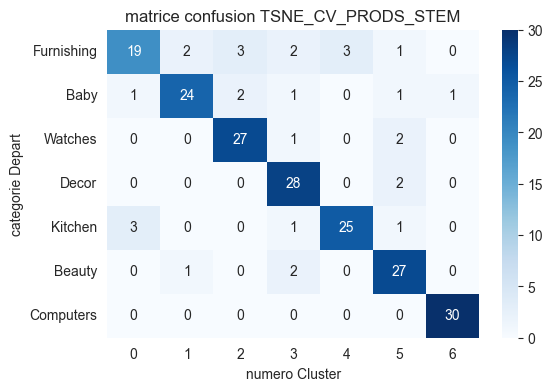

In [350]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

**Avec réduction ACP**

In [373]:
type_donnee = 'TSNE_ACP_CV_PRODS_STEM'

df_data_prods_stem_cv = vectorize_text_data(data_prods_stem, CountVectorizer())
df_data_prods_stem_cv_acp = acp(df_data_prods_stem_cv)
df_data_prods_stem_cv_acp_tsne = tsne(df_data_prods_stem_cv_acp, 40)

(1050, 2544)
Nombre de features après réduction ACP pour 99.0% de variance : 388


In [374]:
# Dataframe pour clustering
df_data_prods_stem_cv_acp_tsne = pd.DataFrame({'VAR1' : df_data_prods_stem_cv_acp_tsne['DIM1'],
                                           'VAR2' : df_data_prods_stem_cv_acp_tsne['DIM2'],
                                           'CATEGORIE' : data_work['category']})

**Entrainement du modèle**

In [375]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_data_prods_stem_cv_acp_tsne[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [376]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.9143
Precision:
  - Macro: 0.9148
  - Micro: 0.9143
Recall:
  - Macro: 0.9143
  - Micro: 0.9143
F1-measure:
  - Macro: 0.9140
  - Micro: 0.9143


{'knn': {'micro_precision': 0.9142857142857143,
  'micro_recall': 0.9142857142857143,
  'micro_f1': 0.9142857142857143},
 'svm': {'micro_precision': 0.4119047619047619,
  'micro_recall': 0.4119047619047619,
  'micro_f1': 0.4119047619047619},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6142857142857143,
  'micro_recall': 0.6142857142857143,
  'micro_f1': 0.6142857142857143},
 'Gradient Boosting': {'micro_precision': 0.9904761904761905,
  'micro_recall': 0.9904761904761905,
  'micro_f1': 0.9904761904761905},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [377]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.4024
Precision:
  - Macro: 0.3894
  - Micro: 0.4024
Recall:
  - Macro: 0.4024
  - Micro: 0.4024
F1-measure:
  - Macro: 0.3526
  - Micro: 0.4024


{'knn': {'micro_precision': 0.9142857142857143,
  'micro_recall': 0.9142857142857143,
  'micro_f1': 0.9142857142857143},
 'svm': {'micro_precision': 0.4023809523809524,
  'micro_recall': 0.4023809523809524,
  'micro_f1': 0.4023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6142857142857143,
  'micro_recall': 0.6142857142857143,
  'micro_f1': 0.6142857142857143},
 'Gradient Boosting': {'micro_precision': 0.9904761904761905,
  'micro_recall': 0.9904761904761905,
  'micro_f1': 0.9904761904761905},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [378]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9142857142857143,
  'micro_recall': 0.9142857142857143,
  'micro_f1': 0.9142857142857143},
 'svm': {'micro_precision': 0.4023809523809524,
  'micro_recall': 0.4023809523809524,
  'micro_f1': 0.4023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6142857142857143,
  'micro_recall': 0.6142857142857143,
  'micro_f1': 0.6142857142857143},
 'Gradient Boosting': {'micro_precision': 0.9904761904761905,
  'micro_recall': 0.9904761904761905,
  'micro_f1': 0.9904761904761905},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [379]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.6167
Precision:
  - Macro: 0.6439
  - Micro: 0.6167
Recall:
  - Macro: 0.6167
  - Micro: 0.6167
F1-measure:
  - Macro: 0.6002
  - Micro: 0.6167


{'knn': {'micro_precision': 0.9142857142857143,
  'micro_recall': 0.9142857142857143,
  'micro_f1': 0.9142857142857143},
 'svm': {'micro_precision': 0.4023809523809524,
  'micro_recall': 0.4023809523809524,
  'micro_f1': 0.4023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6166666666666667,
  'micro_recall': 0.6166666666666667,
  'micro_f1': 0.6166666666666667},
 'Gradient Boosting': {'micro_precision': 0.9904761904761905,
  'micro_recall': 0.9904761904761905,
  'micro_f1': 0.9904761904761905},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [380]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9905
Precision:
  - Macro: 0.9906
  - Micro: 0.9905
Recall:
  - Macro: 0.9905
  - Micro: 0.9905
F1-measure:
  - Macro: 0.9905
  - Micro: 0.9905


{'knn': {'micro_precision': 0.9142857142857143,
  'micro_recall': 0.9142857142857143,
  'micro_f1': 0.9142857142857143},
 'svm': {'micro_precision': 0.4023809523809524,
  'micro_recall': 0.4023809523809524,
  'micro_f1': 0.4023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6166666666666667,
  'micro_recall': 0.6166666666666667,
  'micro_f1': 0.6166666666666667},
 'Gradient Boosting': {'micro_precision': 0.9904761904761905,
  'micro_recall': 0.9904761904761905,
  'micro_f1': 0.9904761904761905},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [381]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9142857142857143,
  'micro_recall': 0.9142857142857143,
  'micro_f1': 0.9142857142857143},
 'svm': {'micro_precision': 0.4023809523809524,
  'micro_recall': 0.4023809523809524,
  'micro_f1': 0.4023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6166666666666667,
  'micro_recall': 0.6166666666666667,
  'micro_f1': 0.6166666666666667},
 'Gradient Boosting': {'micro_precision': 0.9904761904761905,
  'micro_recall': 0.9904761904761905,
  'micro_f1': 0.9904761904761905},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [382]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.914286,0.914286,0.914286
svm,0.402381,0.402381,0.402381
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.616667,0.616667,0.616667
Gradient Boosting,0.990476,0.990476,0.990476
extra tree classifier,1.000000,1.000000,1.000000


In [383]:
etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.862


In [384]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)

labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_var_prod_stem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_var_prod_stem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[20  1  1  3  4  1  0]
 [ 2 25  2  0  0  0  1]
 [ 0  0 27  1  0  2  0]
 [ 0  0  0 28  0  2  0]
 [ 4  0  0  1 24  1  0]
 [ 0  0  0  3  0 27  0]
 [ 0  0  0  0  0  0 30]]

ACCURACY TSNE_ACP_CV_PRODS_STEM (Test): 0.862
ACCURACY TSNE_ACP_CV_PRODS_STEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.96      0.83      0.89        30
           2       0.90      0.90      0.90        30
           3       0.78      0.93      0.85        30
           4       0.86      0.80      0.83        30
           5       0.82      0.90      0.86        30
           6       0.97      1.00      0.98        30

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.86      0.86      0.86       210



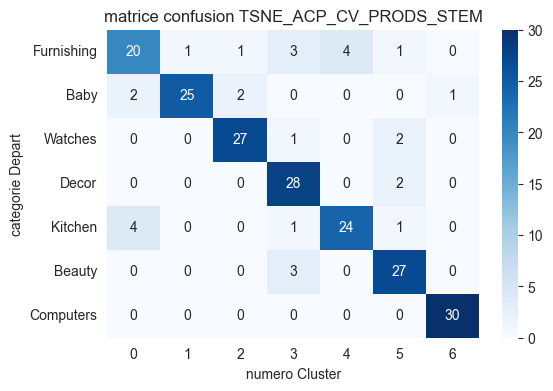

In [385]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

#### <span style='background:wheat'>3.1.3 TfIdfVectorizer</span>

<span style='background:orange'>**3.1.3.1. produit_specifications** - lemmatisée </span>

**Sans réduction ACP**

In [387]:
type_donnee = 'TSNE_TFIDF_PRODS_LEM'

In [386]:
df_prods_lem_tfidf = vectorize_text_data(data_prods_lem, TfidfVectorizer())
df_prods_lem_tfidf_tsne = tsne(df_prods_lem_tfidf, 40)

(1050, 2638)


In [388]:
# Dataframe pour clustering
df_prods_lem_tfidf_tsne = pd.DataFrame({'VAR1' : df_prods_lem_tfidf_tsne['DIM1'],
                                           'VAR2' : df_prods_lem_tfidf_tsne['DIM2'],
                                           'CATEGORIE' : data_work['category']})

**Entraienment du modèle**

In [389]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_prods_lem_tfidf_tsne[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [390]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.9417
Precision:
  - Macro: 0.9421
  - Micro: 0.9417
Recall:
  - Macro: 0.9417
  - Micro: 0.9417
F1-measure:
  - Macro: 0.9416
  - Micro: 0.9417


{'knn': {'micro_precision': 0.9416666666666667,
  'micro_recall': 0.9416666666666667,
  'micro_f1': 0.9416666666666667},
 'svm': {'micro_precision': 0.4023809523809524,
  'micro_recall': 0.4023809523809524,
  'micro_f1': 0.4023809523809524},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6166666666666667,
  'micro_recall': 0.6166666666666667,
  'micro_f1': 0.6166666666666667},
 'Gradient Boosting': {'micro_precision': 0.9904761904761905,
  'micro_recall': 0.9904761904761905,
  'micro_f1': 0.9904761904761905},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [391]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.3048
Precision:
  - Macro: 0.1613
  - Micro: 0.3048
Recall:
  - Macro: 0.3048
  - Micro: 0.3048
F1-measure:
  - Macro: 0.2066
  - Micro: 0.3048


{'knn': {'micro_precision': 0.9416666666666667,
  'micro_recall': 0.9416666666666667,
  'micro_f1': 0.9416666666666667},
 'svm': {'micro_precision': 0.3047619047619048,
  'micro_recall': 0.3047619047619048,
  'micro_f1': 0.3047619047619048},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6166666666666667,
  'micro_recall': 0.6166666666666667,
  'micro_f1': 0.6166666666666667},
 'Gradient Boosting': {'micro_precision': 0.9904761904761905,
  'micro_recall': 0.9904761904761905,
  'micro_f1': 0.9904761904761905},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [392]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9416666666666667,
  'micro_recall': 0.9416666666666667,
  'micro_f1': 0.9416666666666667},
 'svm': {'micro_precision': 0.3047619047619048,
  'micro_recall': 0.3047619047619048,
  'micro_f1': 0.3047619047619048},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.6166666666666667,
  'micro_recall': 0.6166666666666667,
  'micro_f1': 0.6166666666666667},
 'Gradient Boosting': {'micro_precision': 0.9904761904761905,
  'micro_recall': 0.9904761904761905,
  'micro_f1': 0.9904761904761905},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [393]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.7500
Precision:
  - Macro: 0.7686
  - Micro: 0.7500
Recall:
  - Macro: 0.7500
  - Micro: 0.7500
F1-measure:
  - Macro: 0.7494
  - Micro: 0.7500


{'knn': {'micro_precision': 0.9416666666666667,
  'micro_recall': 0.9416666666666667,
  'micro_f1': 0.9416666666666667},
 'svm': {'micro_precision': 0.3047619047619048,
  'micro_recall': 0.3047619047619048,
  'micro_f1': 0.3047619047619048},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.75,
  'micro_recall': 0.75,
  'micro_f1': 0.75},
 'Gradient Boosting': {'micro_precision': 0.9904761904761905,
  'micro_recall': 0.9904761904761905,
  'micro_f1': 0.9904761904761905},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [394]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9929
Precision:
  - Macro: 0.9929
  - Micro: 0.9929
Recall:
  - Macro: 0.9929
  - Micro: 0.9929
F1-measure:
  - Macro: 0.9928
  - Micro: 0.9929


{'knn': {'micro_precision': 0.9416666666666667,
  'micro_recall': 0.9416666666666667,
  'micro_f1': 0.9416666666666667},
 'svm': {'micro_precision': 0.3047619047619048,
  'micro_recall': 0.3047619047619048,
  'micro_f1': 0.3047619047619048},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.75,
  'micro_recall': 0.75,
  'micro_f1': 0.75},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [395]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9416666666666667,
  'micro_recall': 0.9416666666666667,
  'micro_f1': 0.9416666666666667},
 'svm': {'micro_precision': 0.3047619047619048,
  'micro_recall': 0.3047619047619048,
  'micro_f1': 0.3047619047619048},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.75,
  'micro_recall': 0.75,
  'micro_f1': 0.75},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [396]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.941667,0.941667,0.941667
svm,0.304762,0.304762,0.304762
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.750000,0.750000,0.750000
Gradient Boosting,0.992857,0.992857,0.992857
extra tree classifier,1.000000,1.000000,1.000000


In [397]:
etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.905


In [398]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)

labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_var_prod_stem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_var_prod_stem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[22  2  0  1  5  0  0]
 [ 1 25  1  3  0  0  0]
 [ 0  0 28  2  0  0  0]
 [ 0  1  0 28  0  1  0]
 [ 1  0  0  1 28  0  0]
 [ 0  1  0  0  0 29  0]
 [ 0  0  0  0  0  0 30]]

ACCURACY TSNE_TFIDF_PRODS_LEM (Test): 0.905
ACCURACY TSNE_TFIDF_PRODS_LEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.86      0.83      0.85        30
           2       0.97      0.93      0.95        30
           3       0.80      0.93      0.86        30
           4       0.85      0.93      0.89        30
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        30

    accuracy                           0.90       210
   macro avg       0.91      0.90      0.90       210
weighted avg       0.91      0.90      0.90       210



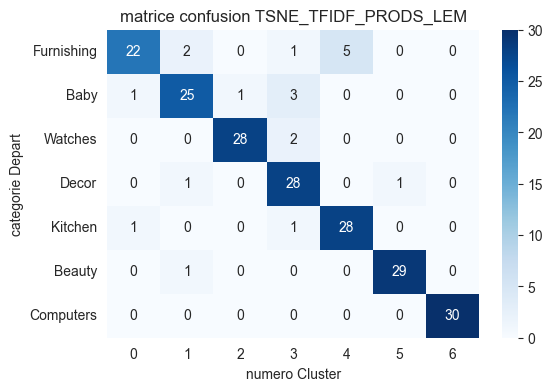

In [399]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

**Avec réduction ACP**

In [401]:
type_donnee = 'TSNE_ACP_TFIDF_PRODS_LEM'

df_data_prods_lem_tfidf = vectorize_text_data(data_prods_lem, TfidfVectorizer())
df_data_prods_lem_tfidf_acp = acp(df_data_prods_lem_tfidf)
df_data_prods_lem_tfidf_acp_tsne = tsne(df_data_prods_lem_tfidf_acp, 40)

(1050, 2638)
Nombre de features après réduction ACP pour 99.0% de variance : 736


In [402]:
# Dataframe pour clustering
df_data_prods_lem_tfidf_acp_tsne = pd.DataFrame({'VAR1' : df_data_prods_lem_tfidf_acp_tsne['DIM1'],
                                           'VAR2' : df_data_prods_lem_tfidf_acp_tsne['DIM2'],
                                           'CATEGORIE' : data_work['category']})

**Entrainement du modèle**

In [403]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_data_prods_lem_tfidf_acp_tsne[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [404]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.9381
Precision:
  - Macro: 0.9383
  - Micro: 0.9381
Recall:
  - Macro: 0.9381
  - Micro: 0.9381
F1-measure:
  - Macro: 0.9381
  - Micro: 0.9381


{'knn': {'micro_precision': 0.9380952380952381,
  'micro_recall': 0.9380952380952381,
  'micro_f1': 0.9380952380952381},
 'svm': {'micro_precision': 0.3047619047619048,
  'micro_recall': 0.3047619047619048,
  'micro_f1': 0.3047619047619048},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.75,
  'micro_recall': 0.75,
  'micro_f1': 0.75},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [405]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.6119
Precision:
  - Macro: 0.5433
  - Micro: 0.6119
Recall:
  - Macro: 0.6119
  - Micro: 0.6119
F1-measure:
  - Macro: 0.5638
  - Micro: 0.6119


{'knn': {'micro_precision': 0.9380952380952381,
  'micro_recall': 0.9380952380952381,
  'micro_f1': 0.9380952380952381},
 'svm': {'micro_precision': 0.611904761904762,
  'micro_recall': 0.611904761904762,
  'micro_f1': 0.611904761904762},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.75,
  'micro_recall': 0.75,
  'micro_f1': 0.75},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [406]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9380952380952381,
  'micro_recall': 0.9380952380952381,
  'micro_f1': 0.9380952380952381},
 'svm': {'micro_precision': 0.611904761904762,
  'micro_recall': 0.611904761904762,
  'micro_f1': 0.611904761904762},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.75,
  'micro_recall': 0.75,
  'micro_f1': 0.75},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [407]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.7762
Precision:
  - Macro: 0.7889
  - Micro: 0.7762
Recall:
  - Macro: 0.7762
  - Micro: 0.7762
F1-measure:
  - Macro: 0.7743
  - Micro: 0.7762


{'knn': {'micro_precision': 0.9380952380952381,
  'micro_recall': 0.9380952380952381,
  'micro_f1': 0.9380952380952381},
 'svm': {'micro_precision': 0.611904761904762,
  'micro_recall': 0.611904761904762,
  'micro_f1': 0.611904761904762},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7761904761904762,
  'micro_recall': 0.7761904761904762,
  'micro_f1': 0.7761904761904762},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [408]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9929
Precision:
  - Macro: 0.9929
  - Micro: 0.9929
Recall:
  - Macro: 0.9929
  - Micro: 0.9929
F1-measure:
  - Macro: 0.9929
  - Micro: 0.9929


{'knn': {'micro_precision': 0.9380952380952381,
  'micro_recall': 0.9380952380952381,
  'micro_f1': 0.9380952380952381},
 'svm': {'micro_precision': 0.611904761904762,
  'micro_recall': 0.611904761904762,
  'micro_f1': 0.611904761904762},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7761904761904762,
  'micro_recall': 0.7761904761904762,
  'micro_f1': 0.7761904761904762},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [409]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9380952380952381,
  'micro_recall': 0.9380952380952381,
  'micro_f1': 0.9380952380952381},
 'svm': {'micro_precision': 0.611904761904762,
  'micro_recall': 0.611904761904762,
  'micro_f1': 0.611904761904762},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7761904761904762,
  'micro_recall': 0.7761904761904762,
  'micro_f1': 0.7761904761904762},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [410]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.938095,0.938095,0.938095
svm,0.611905,0.611905,0.611905
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.776190,0.776190,0.776190
Gradient Boosting,0.992857,0.992857,0.992857
extra tree classifier,1.000000,1.000000,1.000000


In [411]:
etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.862


In [412]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)

labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_var_prod_stem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_var_prod_stem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[19  2  0  2  7  0  0]
 [ 0 24  1  3  0  1  1]
 [ 0  0 28  1  1  0  0]
 [ 0  1  1 26  1  1  0]
 [ 4  0  0  1 25  0  0]
 [ 0  0  0  1  0 29  0]
 [ 0  0  0  0  0  0 30]]

ACCURACY TSNE_ACP_TFIDF_PRODS_LEM (Test): 0.862
ACCURACY TSNE_ACP_TFIDF_PRODS_LEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.89      0.80      0.84        30
           2       0.93      0.93      0.93        30
           3       0.76      0.87      0.81        30
           4       0.74      0.83      0.78        30
           5       0.94      0.97      0.95        30
           6       0.97      1.00      0.98        30

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.86      0.86      0.86       210



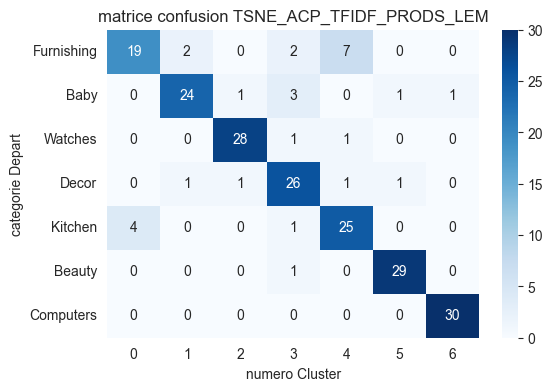

In [413]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

<span style='background:orange'>**3.1.3.2. produit_specifications** - racinisée </span>

**Sans réduction ACP**

In [414]:
type_donnee = 'TSNE_TFIDF_PRODS_STEM'

In [415]:
df_prods_stem_tfidf = vectorize_text_data(data_prods_stem, TfidfVectorizer())
df_prods_stem_tfidf_tsne = tsne(df_prods_stem_tfidf, 40)

(1050, 2544)


In [416]:
# Dataframe pour clustering
df_prods_stem_tfidf_tsne = pd.DataFrame({'VAR1' : df_prods_stem_tfidf_tsne['DIM1'],
                                           'VAR2' : df_prods_stem_tfidf_tsne['DIM2'],
                                           'CATEGORIE' : data_work['category']})

**Entrainement du modèle**

In [418]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_prods_stem_tfidf_tsne[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [419]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.9369
Precision:
  - Macro: 0.9369
  - Micro: 0.9369
Recall:
  - Macro: 0.9369
  - Micro: 0.9369
F1-measure:
  - Macro: 0.9367
  - Micro: 0.9369


{'knn': {'micro_precision': 0.9369047619047619,
  'micro_recall': 0.9369047619047619,
  'micro_f1': 0.9369047619047619},
 'svm': {'micro_precision': 0.611904761904762,
  'micro_recall': 0.611904761904762,
  'micro_f1': 0.611904761904762},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7761904761904762,
  'micro_recall': 0.7761904761904762,
  'micro_f1': 0.7761904761904762},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [420]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.4464
Precision:
  - Macro: 0.2821
  - Micro: 0.4464
Recall:
  - Macro: 0.4464
  - Micro: 0.4464
F1-measure:
  - Macro: 0.3270
  - Micro: 0.4464


{'knn': {'micro_precision': 0.9369047619047619,
  'micro_recall': 0.9369047619047619,
  'micro_f1': 0.9369047619047619},
 'svm': {'micro_precision': 0.44642857142857145,
  'micro_recall': 0.44642857142857145,
  'micro_f1': 0.44642857142857145},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7761904761904762,
  'micro_recall': 0.7761904761904762,
  'micro_f1': 0.7761904761904762},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [421]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9369047619047619,
  'micro_recall': 0.9369047619047619,
  'micro_f1': 0.9369047619047619},
 'svm': {'micro_precision': 0.44642857142857145,
  'micro_recall': 0.44642857142857145,
  'micro_f1': 0.44642857142857145},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7761904761904762,
  'micro_recall': 0.7761904761904762,
  'micro_f1': 0.7761904761904762},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [423]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.7214
Precision:
  - Macro: 0.7436
  - Micro: 0.7214
Recall:
  - Macro: 0.7214
  - Micro: 0.7214
F1-measure:
  - Macro: 0.7183
  - Micro: 0.7214


{'knn': {'micro_precision': 0.9369047619047619,
  'micro_recall': 0.9369047619047619,
  'micro_f1': 0.9369047619047619},
 'svm': {'micro_precision': 0.44642857142857145,
  'micro_recall': 0.44642857142857145,
  'micro_f1': 0.44642857142857145},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7214285714285714,
  'micro_recall': 0.7214285714285714,
  'micro_f1': 0.7214285714285713},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [422]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9929
Precision:
  - Macro: 0.9929
  - Micro: 0.9929
Recall:
  - Macro: 0.9929
  - Micro: 0.9929
F1-measure:
  - Macro: 0.9929
  - Micro: 0.9929


{'knn': {'micro_precision': 0.9369047619047619,
  'micro_recall': 0.9369047619047619,
  'micro_f1': 0.9369047619047619},
 'svm': {'micro_precision': 0.44642857142857145,
  'micro_recall': 0.44642857142857145,
  'micro_f1': 0.44642857142857145},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7761904761904762,
  'micro_recall': 0.7761904761904762,
  'micro_f1': 0.7761904761904762},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [424]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9369047619047619,
  'micro_recall': 0.9369047619047619,
  'micro_f1': 0.9369047619047619},
 'svm': {'micro_precision': 0.44642857142857145,
  'micro_recall': 0.44642857142857145,
  'micro_f1': 0.44642857142857145},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7214285714285714,
  'micro_recall': 0.7214285714285714,
  'micro_f1': 0.7214285714285713},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [425]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.936905,0.936905,0.936905
svm,0.446429,0.446429,0.446429
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.721429,0.721429,0.721429
Gradient Boosting,0.992857,0.992857,0.992857
extra tree classifier,1.000000,1.000000,1.000000


In [426]:
etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.886


In [427]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)

labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_var_prod_stem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_var_prod_stem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[23  1  0  1  5  0  0]
 [ 0 24  1  4  0  0  1]
 [ 0  0 28  2  0  0  0]
 [ 0  1  0 27  0  2  0]
 [ 3  0  0  1 26  0  0]
 [ 0  0  0  2  0 28  0]
 [ 0  0  0  0  0  0 30]]

ACCURACY TSNE_TFIDF_PRODS_STEM (Test): 0.886
ACCURACY TSNE_TFIDF_PRODS_STEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.92      0.80      0.86        30
           2       0.97      0.93      0.95        30
           3       0.73      0.90      0.81        30
           4       0.84      0.87      0.85        30
           5       0.93      0.93      0.93        30
           6       0.97      1.00      0.98        30

    accuracy                           0.89       210
   macro avg       0.89      0.89      0.89       210
weighted avg       0.89      0.89      0.89       210



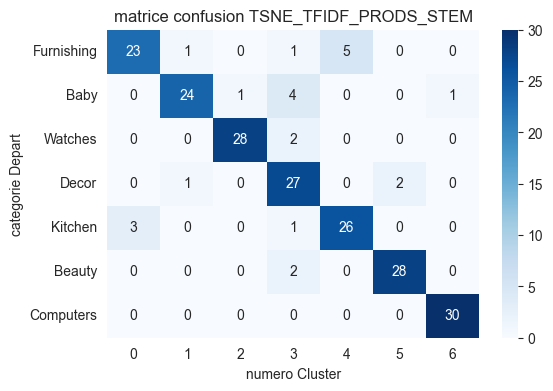

In [428]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

**Avec réduction ACP**

In [429]:
type_donnee = 'TSNE_ACP_TFIDF_PRODS_STEM'

df_data_prods_stem_tfidf = vectorize_text_data(data_prods_stem, TfidfVectorizer())
df_data_prods_stem_tfidf_acp = acp(df_data_prods_stem_tfidf)
df_data_prods_stem_tfidf_acp_tsne = tsne(df_data_prods_stem_tfidf_acp, 40)

(1050, 2544)
Nombre de features après réduction ACP pour 99.0% de variance : 732


In [430]:
# Dataframe pour clustering
df_data_prods_stem_tfidf_acp_tsne = pd.DataFrame({'VAR1' : df_data_prods_stem_tfidf_acp_tsne['DIM1'],
                                           'VAR2' : df_data_prods_stem_tfidf_acp_tsne['DIM2'],
                                           'CATEGORIE' : data_work['category']})

**Entrainement du modèle**

In [431]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_data_prods_stem_tfidf_acp_tsne[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [432]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.9321
Precision:
  - Macro: 0.9318
  - Micro: 0.9321
Recall:
  - Macro: 0.9321
  - Micro: 0.9321
F1-measure:
  - Macro: 0.9317
  - Micro: 0.9321


{'knn': {'micro_precision': 0.9321428571428572,
  'micro_recall': 0.9321428571428572,
  'micro_f1': 0.9321428571428572},
 'svm': {'micro_precision': 0.44642857142857145,
  'micro_recall': 0.44642857142857145,
  'micro_f1': 0.44642857142857145},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7214285714285714,
  'micro_recall': 0.7214285714285714,
  'micro_f1': 0.7214285714285713},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [433]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.2857
Precision:
  - Macro: 0.2017
  - Micro: 0.2857
Recall:
  - Macro: 0.2857
  - Micro: 0.2857
F1-measure:
  - Macro: 0.1582
  - Micro: 0.2857


{'knn': {'micro_precision': 0.9321428571428572,
  'micro_recall': 0.9321428571428572,
  'micro_f1': 0.9321428571428572},
 'svm': {'micro_precision': 0.2857142857142857,
  'micro_recall': 0.2857142857142857,
  'micro_f1': 0.2857142857142857},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7214285714285714,
  'micro_recall': 0.7214285714285714,
  'micro_f1': 0.7214285714285713},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [434]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9321428571428572,
  'micro_recall': 0.9321428571428572,
  'micro_f1': 0.9321428571428572},
 'svm': {'micro_precision': 0.2857142857142857,
  'micro_recall': 0.2857142857142857,
  'micro_f1': 0.2857142857142857},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7214285714285714,
  'micro_recall': 0.7214285714285714,
  'micro_f1': 0.7214285714285713},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [435]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.7393
Precision:
  - Macro: 0.7604
  - Micro: 0.7393
Recall:
  - Macro: 0.7393
  - Micro: 0.7393
F1-measure:
  - Macro: 0.7384
  - Micro: 0.7393


{'knn': {'micro_precision': 0.9321428571428572,
  'micro_recall': 0.9321428571428572,
  'micro_f1': 0.9321428571428572},
 'svm': {'micro_precision': 0.2857142857142857,
  'micro_recall': 0.2857142857142857,
  'micro_f1': 0.2857142857142857},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7392857142857143,
  'micro_recall': 0.7392857142857143,
  'micro_f1': 0.7392857142857143},
 'Gradient Boosting': {'micro_precision': 0.9928571428571429,
  'micro_recall': 0.9928571428571429,
  'micro_f1': 0.9928571428571429},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [436]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9988
Precision:
  - Macro: 0.9988
  - Micro: 0.9988
Recall:
  - Macro: 0.9988
  - Micro: 0.9988
F1-measure:
  - Macro: 0.9988
  - Micro: 0.9988


{'knn': {'micro_precision': 0.9321428571428572,
  'micro_recall': 0.9321428571428572,
  'micro_f1': 0.9321428571428572},
 'svm': {'micro_precision': 0.2857142857142857,
  'micro_recall': 0.2857142857142857,
  'micro_f1': 0.2857142857142857},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7392857142857143,
  'micro_recall': 0.7392857142857143,
  'micro_f1': 0.7392857142857143},
 'Gradient Boosting': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [437]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9321428571428572,
  'micro_recall': 0.9321428571428572,
  'micro_f1': 0.9321428571428572},
 'svm': {'micro_precision': 0.2857142857142857,
  'micro_recall': 0.2857142857142857,
  'micro_f1': 0.2857142857142857},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.7392857142857143,
  'micro_recall': 0.7392857142857143,
  'micro_f1': 0.7392857142857143},
 'Gradient Boosting': {'micro_precision': 0.9988095238095238,
  'micro_recall': 0.9988095238095238,
  'micro_f1': 0.9988095238095238},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [438]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.932143,0.932143,0.932143
svm,0.285714,0.285714,0.285714
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.739286,0.739286,0.739286
Gradient Boosting,0.998810,0.998810,0.998810
extra tree classifier,1.000000,1.000000,1.000000


In [439]:
etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.881


In [440]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)

labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_roberta_var_prod_stem_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_roberta_var_prod_stem_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_roberta_var_prod_stem_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[23  2  0  1  4  0  0]
 [ 0 24  2  4  0  0  0]
 [ 0  0 28  2  0  0  0]
 [ 3  1  0 25  0  1  0]
 [ 3  0  0  1 26  0  0]
 [ 0  0  0  1  0 29  0]
 [ 0  0  0  0  0  0 30]]

ACCURACY TSNE_ACP_TFIDF_PRODS_STEM (Test): 0.881
ACCURACY TSNE_ACP_TFIDF_PRODS_STEM (Train): 1.0


              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.89      0.80      0.84        30
           2       0.93      0.93      0.93        30
           3       0.74      0.83      0.78        30
           4       0.87      0.87      0.87        30
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        30

    accuracy                           0.88       210
   macro avg       0.88      0.88      0.88       210
weighted avg       0.88      0.88      0.88       210



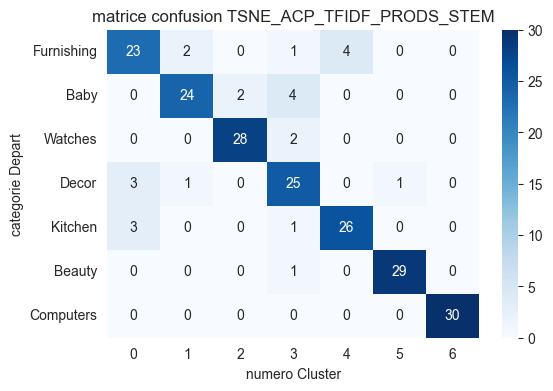

In [441]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

#### <span style='background:wheat'>3.1.4 USE</span>

Le modèle 'universal sentence encoder model' encode les données textuelles dans des vecteurs de haute dimension appelés embeddings qui sont des représentations numériques des données textuelles. Il vise spécifiquement l'apprentissage par transfert à d'autres tâches de NLP, telles que la similarité sémantique, le regroupement, et autres.

In [47]:
# Suppression des waring, info
tf.get_logger().setLevel('ERROR')

#### <span style='background:gold'> 3.1.4.1.  universal-sentence-encoder/3</span>

In [54]:
use_module_url = 'https://tfhub.dev/google/universal-sentence-encoder/3'

<span style='background:orange'>**3.1.4.1.1. produit_specifications** - original </span>

In [158]:
# Variable dont on veut extraire les features
data_work['product_specifications'] = \
    data_work['product_specifications'].fillna('').astype(str)
data_prods_orig = data_work['product_specifications']

In [159]:
type_donnee = 'TSNE_USE_PRODS_ORIG'

# Chargement du modèle
use_model_prods_orig = hub.load(use_module_url)
print('Module %s Chargé' % use_module_url)

vector_use_prods_orig = use_model_prods_orig(data_prods_orig)

Module https://tfhub.dev/google/universal-sentence-encoder/3 Chargé


In [156]:
# Réduction de dimension tsne

# Extraction des vecteurs du dictionnaire et conversion en type array Numpy
vectors_use = np.array(list(vector_use_prods_orig.values()))[0]

tsne_use_prods_orig = TSNE(verbose=1, perplexity=80, n_iter=5000)
X_proj_tsne_use_prods_orig = \
    tsne_use_prods_orig.fit_transform(vectors_use)
# Dataframe pour clustering
df_tsne_use_prods_orig = \
    pd.DataFrame({'VAR1' : X_proj_tsne_use_prods_orig[:, 0],
                  'VAR2' : X_proj_tsne_use_prods_orig[:, 1],
                  'CATEGORIE' : data_work['category']})

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.016s...
[t-SNE] Computed neighbors for 1050 samples in 0.164s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 0.238776
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.666309
[t-SNE] KL divergence after 2000 iterations: 0.428127


**Entrainement du modèle**

In [162]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_tsne_use_prods_orig[cols], data_work.label, test_size=0.2, stratify=data_work.label, random_state=1944)

In [165]:
knn_clf_sup = KNeighborsClassifier()
knn_clf_sup.fit(Xtrain, ytrain)
knn_predictions = knn_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("knn", ytrain, knn_predictions, models_performance)

------knn Model Metrics-----
Accuracy: 0.9321
Precision:
  - Macro: 0.9353
  - Micro: 0.9321
Recall:
  - Macro: 0.9321
  - Micro: 0.9321
F1-measure:
  - Macro: 0.9316
  - Micro: 0.9321


{'knn': {'micro_precision': 0.9321428571428572,
  'micro_recall': 0.9321428571428572,
  'micro_f1': 0.9321428571428572}}

In [166]:
svm_clf_sup = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf_sup.fit(Xtrain, ytrain)
svm_predictions = svm_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("svm", ytrain, svm_predictions, models_performance)

------svm Model Metrics-----
Accuracy: 0.7607
Precision:
  - Macro: 0.7625
  - Micro: 0.7607
Recall:
  - Macro: 0.7607
  - Micro: 0.7607
F1-measure:
  - Macro: 0.7529
  - Micro: 0.7607


{'knn': {'micro_precision': 0.9321428571428572,
  'micro_recall': 0.9321428571428572,
  'micro_f1': 0.9321428571428572},
 'svm': {'micro_precision': 0.7607142857142857,
  'micro_recall': 0.7607142857142857,
  'micro_f1': 0.7607142857142857}}

In [167]:
rf_clf_sup = RandomForestClassifier(n_jobs=-1)
rf_clf_sup.fit(Xtrain, ytrain)
rf_predictions = rf_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Random Forest", ytrain, rf_predictions, models_performance)

------Random Forest Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9321428571428572,
  'micro_recall': 0.9321428571428572,
  'micro_f1': 0.9321428571428572},
 'svm': {'micro_precision': 0.7607142857142857,
  'micro_recall': 0.7607142857142857,
  'micro_f1': 0.7607142857142857},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

In [168]:
gnb_clf_sup = OneVsRestClassifier(GaussianNB())
gnb_clf_sup.fit(Xtrain, ytrain)
gnb_predictions = gnb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Naive Bayes", ytrain, gnb_predictions, models_performance)    

------Naive Bayes Model Metrics-----
Accuracy: 0.8155
Precision:
  - Macro: 0.8243
  - Micro: 0.8155
Recall:
  - Macro: 0.8155
  - Micro: 0.8155
F1-measure:
  - Macro: 0.8106
  - Micro: 0.8155


{'knn': {'micro_precision': 0.9321428571428572,
  'micro_recall': 0.9321428571428572,
  'micro_f1': 0.9321428571428572},
 'svm': {'micro_precision': 0.7607142857142857,
  'micro_recall': 0.7607142857142857,
  'micro_f1': 0.7607142857142857},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.8154761904761905,
  'micro_recall': 0.8154761904761905,
  'micro_f1': 0.8154761904761905}}

In [169]:
gb_clf_sup = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf_sup.fit(Xtrain, ytrain)
gb_predictions = gb_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("Gradient Boosting", ytrain, gb_predictions, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.9893
Precision:
  - Macro: 0.9894
  - Micro: 0.9893
Recall:
  - Macro: 0.9893
  - Micro: 0.9893
F1-measure:
  - Macro: 0.9893
  - Micro: 0.9893


{'knn': {'micro_precision': 0.9321428571428572,
  'micro_recall': 0.9321428571428572,
  'micro_f1': 0.9321428571428572},
 'svm': {'micro_precision': 0.7607142857142857,
  'micro_recall': 0.7607142857142857,
  'micro_f1': 0.7607142857142857},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.8154761904761905,
  'micro_recall': 0.8154761904761905,
  'micro_f1': 0.8154761904761905},
 'Gradient Boosting': {'micro_precision': 0.9892857142857143,
  'micro_recall': 0.9892857142857143,
  'micro_f1': 0.9892857142857143}}

In [170]:
etc_clf_sup = ExtraTreesClassifier(random_state=0)
etc_clf_sup.fit(Xtrain, ytrain)
etc_predictions = etc_clf_sup.predict(Xtrain)
fonctions_data.metrics_report("extra tree classifier", ytrain, etc_predictions, models_performance)

------extra tree classifier Model Metrics-----
Accuracy: 1.0000
Precision:
  - Macro: 1.0000
  - Micro: 1.0000
Recall:
  - Macro: 1.0000
  - Micro: 1.0000
F1-measure:
  - Macro: 1.0000
  - Micro: 1.0000


{'knn': {'micro_precision': 0.9321428571428572,
  'micro_recall': 0.9321428571428572,
  'micro_f1': 0.9321428571428572},
 'svm': {'micro_precision': 0.7607142857142857,
  'micro_recall': 0.7607142857142857,
  'micro_f1': 0.7607142857142857},
 'Random Forest': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0},
 'Naive Bayes': {'micro_precision': 0.8154761904761905,
  'micro_recall': 0.8154761904761905,
  'micro_f1': 0.8154761904761905},
 'Gradient Boosting': {'micro_precision': 0.9892857142857143,
  'micro_recall': 0.9892857142857143,
  'micro_f1': 0.9892857142857143},
 'extra tree classifier': {'micro_precision': 1.0,
  'micro_recall': 1.0,
  'micro_f1': 1.0}}

**Synthèse des résultats**

In [171]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1
knn,0.932143,0.932143,0.932143
svm,0.760714,0.760714,0.760714
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.815476,0.815476,0.815476
Gradient Boosting,0.989286,0.989286,0.989286
extra tree classifier,1.000000,1.000000,1.000000


In [172]:
etc_model = ExtraTreesClassifier(random_state=0).fit(Xtrain, ytrain) 
etc_predictions = etc_model.predict(Xtest) 

# model accuracy for X_test   
accuracy_etc = etc_model.score(Xtest, ytest) 
print("Accuracy de l'algorithme etc :", round(accuracy_etc, 3))

Accuracy de l'algorithme etc : 0.914


In [176]:
conf_mat = confusion_matrix(lab_encod.inverse_transform(ytest), lab_encod.inverse_transform(etc_model.predict(Xtest)))
print(conf_mat)
#test_labels = le.inverse_transform(y_test)
labels_transform_train = fonctions_data.conf_mat_transform(ytrain, etc_model.predict(Xtrain))
labels_transform_test = fonctions_data.conf_mat_transform(ytest, etc_model.predict(Xtest))

accuracy_tsne_use_prods_orig_test = accuracy_score(ytest, labels_transform_test)
accuracy_tsne_use_prods_orig_train = accuracy_score(ytrain, labels_transform_train)

print()
print("ACCURACY {} (Test): {:.3}".format(type_donnee, accuracy_tsne_use_prods_orig_test))
print("ACCURACY {} (Train): {:.3}".format(type_donnee, accuracy_tsne_use_prods_orig_train))
print()

print()
print(classification_report(ytest, labels_transform_test))

[[24  1  0  1  4  0  0]
 [ 0 26  2  2  0  0  0]
 [ 0  0 29  1  0  0  0]
 [ 0  0  0 29  0  1  0]
 [ 4  0  0  1 24  1  0]
 [ 0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0 30]]

ACCURACY TSNE_USE_PRODS_ORIG (Test): 0.914
ACCURACY TSNE_USE_PRODS_ORIG (Train): 1.0


              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.96      0.87      0.91        30
           2       0.94      0.97      0.95        30
           3       0.85      0.97      0.91        30
           4       0.86      0.80      0.83        30
           5       0.94      1.00      0.97        30
           6       1.00      1.00      1.00        30

    accuracy                           0.91       210
   macro avg       0.91      0.91      0.91       210
weighted avg       0.91      0.91      0.91       210



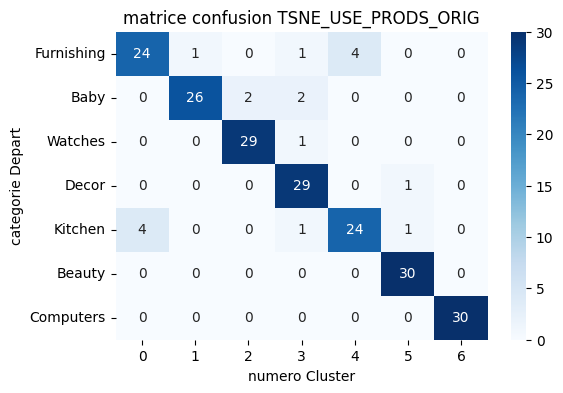

In [179]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel('numero Cluster')
plt.ylabel('categorie Depart')
plt.title(f'matrice confusion {type_donnee}')
plt.show()

### <span style='background:orange'>3.2. Convolutional Neural Networks (CNN) transfer learning</span>

**Approche ImageDatagenerator avec data augmentation**

- Le principe de data augmentation consiste à effectuer des opérations modifiant l’aspect de l’image, sans pour autant en modifier la sémantique : par exemple, en diminuant la luminosité, en effectuant une rotation, etc…
- Cette méthode s'applique lorsque le jeu d’apprentissage est petit, voire inexistant. celui-ci va générer un échantillon d'images labelisées de taille suffisante afin d'alimenter un algorithme de type CNN (VGG16,...). 

#### <span style='background:wheat'>3.2.1 VGG19</span>

**Mise en place du modèle**

In [45]:
# import packages
import keras
from keras import optimizers
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Dense, Flatten, Dropout
#from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout

from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array

**Préparation des données**

**1 - Création du Data Generator**

In [69]:
# Créer un générateur d'images
datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True,
                             validation_split=0.25,
                             preprocessing_function=preprocess_input)

**2. Séparation du jeu de données**

Nous allons procéder à la séparation de notre jeu de données à travers la méthode du train_test_split.

Toutefois, nous allons séparer notre jeu de données en 3 parties :

jeu d'entrainement : 80% de notre base de données,
jeu de test : 20% de notre base de données
jeu de validation : 25% du jeu de test.

In [71]:
# Sélectionner les caractéristiques et les étiquettes

X = data_imc['image_loc']

y = data_imc['Categorie_1']

# Encoage des categories
lab_encod = LabelEncoder()
data_imc["label"] = lab_encod.fit_transform(data_imc["Categorie_1"])
cat_code = data_imc["label"].to_list()

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diviser l'ensemble de test en ensembles de test et de validation
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=42)

**3. Finalisation de la préparation**

Nous allons finaliser notre jeu de données à travers la génération de nouvelles images pour nos différentes séparations du jeu de données.

Pour cela, l'utilisation du Data Generator créé en amont sera nécessaire à cette finalisation

In [73]:
# Générer de nouvelles images pour les ensembles d'entraînement

df_train=pd.DataFrame({"image": X_train, "label": y_train})
train_generator = datagen.flow_from_dataframe(dataframe = df_train,
                                              x_col="image", 
                                              y_col="label", 
                                              target_size=(224,224), 
                                              batch_size=32, 
                                              class_mode="categorical")

# Générer de nouvelles images pour l'ensemble de test
df_test = pd.DataFrame({"image": X_test, "label": y_test})
test_generator = datagen.flow_from_dataframe(dataframe= df_test, 
                                             x_col="image", 
                                             y_col="label", 
                                             target_size=(224,224), 
                                             batch_size=32, 
                                             class_mode="categorical")

# Générer de nouvelles images pour l'ensemble de validation
df_val = pd.DataFrame({"image": X_val, "label": y_val})
val_generator = datagen.flow_from_dataframe(dataframe= df_val, 
                                             x_col="image", 
                                             y_col="label", 
                                             target_size=(224,224), 
                                             batch_size=32, 
                                             class_mode="categorical")

Found 840 validated image filenames belonging to 7 classes.
Found 157 validated image filenames belonging to 7 classes.
Found 53 validated image filenames belonging to 7 classes.


**Modélisation - VGG19**

In [539]:
from tensorflow.keras.layers import Input

top_depart = time.time()

# Charger le modèle pré-entrainé VGG19
inputs = Input(shape=(224, 224, 3))
vgg_model = VGG19(include_top=False, weights=None, input_tensor=inputs, classes = 7)
outputs = vgg_model.output

# Ajouter des couches supplémentaires
x = MaxPooling2D(pool_size=(2, 2))(outputs) # couche de pooling
x = Flatten()(x) # couche de flattening
x = Dense(128, activation='relu')(x) # couche dense avec 128 neurones et une fonction d'activation relu
predictions = Dense(7, activation='softmax')(x) # couche dense de sortie avec 7 neurones et une fonction d'activation softmax

# Construire le modèle complet
model = Model(inputs=inputs, outputs=predictions)

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()


# Entraîner le modèle sur les données d'entraînement
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=10,
                    validation_data=val_generator,
                    validation_batch_size=32,
                    callbacks=[early_stop])


print(f"Temps d'execution : {round((time.time()-top_depart)/60, 3)} minutes")

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [533]:
# Création du Early Stop
early_stop = EarlyStopping(monitor='val_loss',patience=3)

# Définir le nombre d'itérations d'entraînement
epochs = 50
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [es]

In [540]:
# Score du dernier epoch

loss, accuracy = model.evaluate(train_generator, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model.evaluate(val_generator, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

27/27 [==============================] - 185s 7s/step - loss: 1.9452 - accuracy: 0.1536
Training Accuracy   : 0.1536

2/2 [==============================] - 14s 5s/step - loss: 1.9507 - accuracy: 0.0943
Validation Accuracy :  0.0943


In [541]:
# Score de l'epoch optimal

#model.load_weights(model_save_path)

loss, accuracy = model.evaluate(val_generator, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(test_generator, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.0943
Test Accuracy       :  0.1019


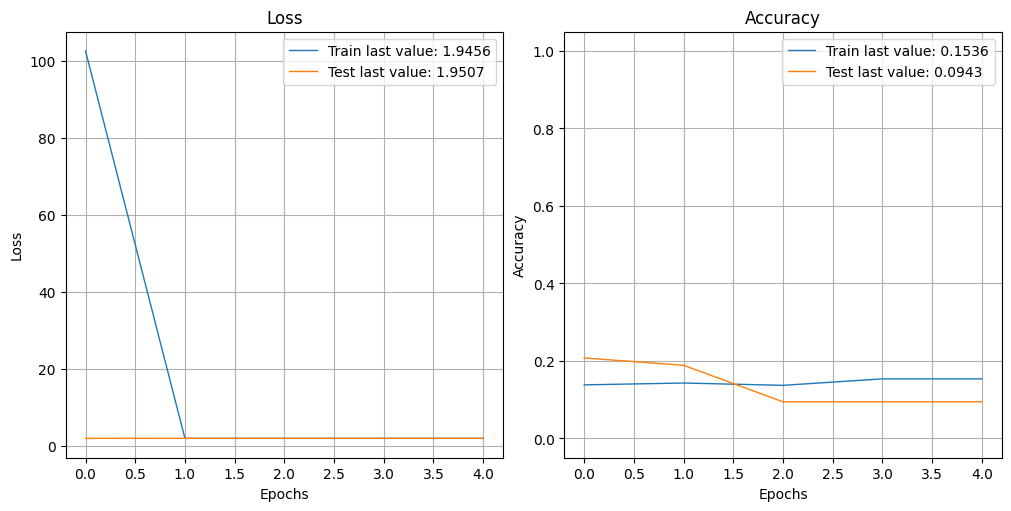

In [544]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history)
plot_history(history, path="standard.png")
plt.close()

**Test**
   
Le jeu de test sera utilisé pour cette dernière phase.

Afin d'analyser les résultats obtenus, nous allons utiliser une matrice de confusion et un rapport de classification.

5/5 [==============================] - 31s 6s/step


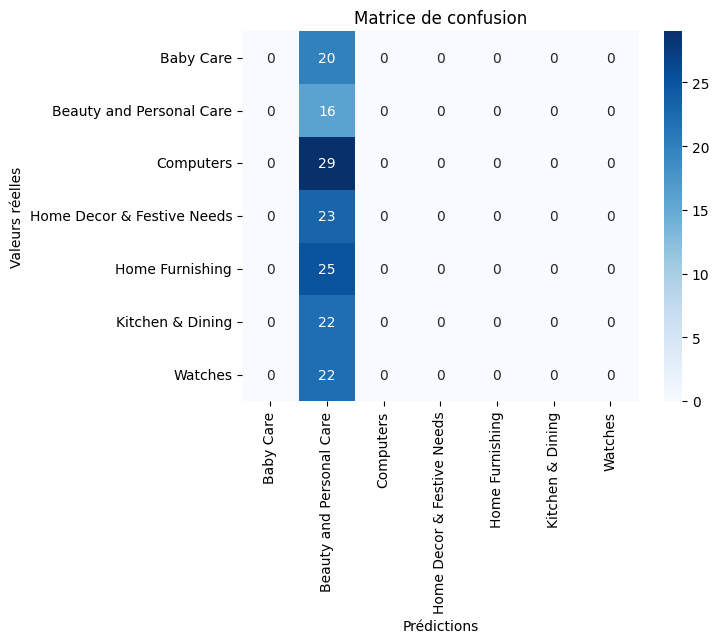

                            precision    recall  f1-score   support

                 Baby Care       0.00      0.00      0.00        20
  Beauty and Personal Care       0.10      1.00      0.18        16
                 Computers       0.00      0.00      0.00        29
Home Decor & Festive Needs       0.00      0.00      0.00        23
           Home Furnishing       0.00      0.00      0.00        25
          Kitchen & Dining       0.00      0.00      0.00        22
                   Watches       0.00      0.00      0.00        22

                  accuracy                           0.10       157
                 macro avg       0.01      0.14      0.03       157
              weighted avg       0.01      0.10      0.02       157



In [542]:
# Appel de notre fonction    
fonctions_data.evaluate_model(model, test_generator)

Ce rapport de classification montre les performances du modèle pour chaque classe et pour l'ensemble des classes. Il montre également l'accuracy globale (précision globale) du modèle pour toutes les classes combinées.

Pour chaque classe, le rapport de classification affiche les mesures de précision, de rappel et de f1-score. La précision mesure la proportion d'images correctement classées dans cette classe parmi toutes les images classées dans cette classe. Le rappel mesure la proportion d'images correctement classées dans cette classe parmi toutes les images réelles de cette classe. Le f1-score est une moyenne harmonique de précision et de rappel.

Le rapport de classification montre que le modèle a des performances très faibles pour toutes les classes, avec des précisions allant de 0 à 0,20, des rappels allant de 0 à 0,23 et des f1-scores allant de 0 à 0,21. Cela suggère que le modèle ne fonctionne pas bien pour la tâche de classification des données de test.

L'accuracy globale est 0e 0,11, ce qui signifie que le modèle n'est correct que 0ans 11% des cas. En conclusion, ce modèle nécessite une amélioration significative pour être utilisé avec succès dans la classification de données.

Voici quelques pistes de réflexion nous permettant d'améliorer notre modèle et par conséquent le test de ce dernier :

Augmenter la quantité de données. Nous avons travaillé avec un jeu de données initial de 1050. Les modèles de Deep Learning sont très attractifs avec plusieurs dizaines voir centaines de milliers de données,

Améliorer la catégorisation des produits. En effet, certains produits ont une catégorie assez similaire et un travail en amont pourrait permettre une meilleure classification,

Utiliser d'autres réseaux de neurones tels que le modèle 'InceptionV3' pour obtenir des résultats plus attractifs.

#### <span style='background:wheat'>3.2.2 InceptionV3</span>

**Modélisation - InceptionV3**

In [74]:
from keras.applications.inception_v3 import preprocess_input
from keras.applications import InceptionV3

top_depart = time.time()

# Charger le modèle pré-entrainé InceptionV3
incepV3_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg', classes=7)

# Ajouter des couches supplémentaires
x = incepV3_model.output
x = Dense(128, activation='relu')(x) # couche dense avec 128 neurones et une fonction d'activation relu
predictions = Dense(7, activation='softmax')(x) # couche dense de sortie avec 7 neurones et une fonction d'activation softmax

# Construire le modèle complet
model = Model(inputs=incepV3_model.input, outputs=predictions)

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()

# Création du callback
model_save_path = "./model_best_weights.h5"
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

# Entraîner le modèle sur les données d'entraînement
top_depart = time.time()
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=10,
                    validation_data=val_generator,
                    validation_batch_size=32,
                    callbacks = callbacks_list)

print(f"Temps d'execution : {round((time.time()-top_depart)/60, 3)} minutes")

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_470 (Conv2D)         (None, None, None, 32)       864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization_470 (B  (None, None, None, 32)       96        ['conv2d_470[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_470 (Activation  (None, None, None, 32)       0         ['batch_normalization_47

Le modèle **InceptionV3** présente les meilleurs résultats avec un accuracy de 0.80 ce qui représente un très bon score. Ce modèle sera conservé pour notre phase d'analyse et de test.

A présent, nous allons procéder à l'analyse de notre meilleur mole50.

Pour cela, le jeu de validation (val_generator) sera utilisé pour l'évaluation.

Enfin, nous pourrons procéder à la phase de test de notre modèle grâce à notre jeu de test.

In [75]:
# Score du dernier epoch

model.load_weights(model_save_path)

loss, accuracy = model.evaluate(train_generator, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model.evaluate(val_generator, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

27/27 [==============================] - 89s 3s/step - loss: 1.8932 - accuracy: 0.3429
Training Accuracy   : 0.3429

2/2 [==============================] - 6s 2s/step - loss: 1.6853 - accuracy: 0.4340
Validation Accuracy :  0.4340


In [76]:
# Score de l'epoch optimal

model.load_weights(model_save_path)

loss, accuracy = model.evaluate(val_generator, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(test_generator, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.3585
Test Accuracy       :  0.3121


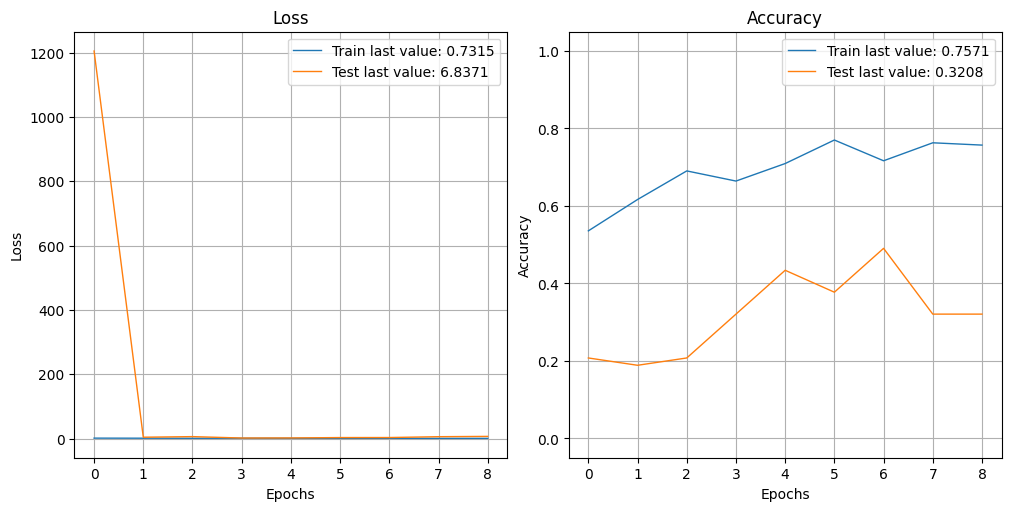

In [77]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history)
plot_history(history, path="standard.png")
plt.close()